# Notebooks figures and tables:
#### 1) F5, S8, S9: The landscape of cancer driver genes
#### 2) T1, T2, T3: Tables
#### 3) S7: Scores and features distributions¶
#### 4) S12: Landscape of CH genes

# 1) F5, S8, S9: The landscape of cancer driver genes

In [356]:
import sys
sys.path.append('../../')
from global_variables import SUBDIR, RUN, WORKSPACE, colors_dict, names_dict, SUBDIR_CH, RUN_CH
import socket
print("Working node:", socket.gethostname())

Working node: irbccn38.hpc.irbbarcelona.pcb.ub.es


In [357]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
import numpy as np
import matplotlib.patches as mpatches
from itertools import chain
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
from matplotlib.colors import Normalize
from scipy import stats
from scipy.stats import gaussian_kde

In [358]:
datasets = f"{WORKSPACE}/projects/clustering_3d/o3d_analysys/datasets/"
input_path = f"{datasets}/input/cancer_202404"
cohort_df = pd.read_csv(f"{input_path}/cohorts.tsv", sep="\t")
cohort_df = cohort_df[~cohort_df.COHORT.str.startswith("ICGC")].reset_index(drop=True)
o3d_output_dir = f"{datasets}/output/cancer_202404/o3d_output/{SUBDIR}/{RUN}"
intogen_output = f"{datasets}/output/cancer_202404/intogen_output"
genetable_path = f"{WORKSPACE}/projects/clustering_3d/o3d_analysys/o3d_paper/notebooks/0.genetables/results/{SUBDIR}/{RUN}.genetable.tsv"
drivers_df = pd.read_table(f"{input_path}/drivers.tsv")
uniq_drivers_df = pd.read_table(f"{input_path}/unique_drivers.tsv")

cgc_df = pd.read_csv(f"{input_path}/CGC_list_v99.tsv", sep = "\t")
display(cgc_df)

oncotree_df = pd.read_csv(f"{datasets}/input/cancer_202404/oncotree.tsv", sep="\t")
display(oncotree_df)

oncokb_df = pd.read_csv(f"{input_path}/oncokb_list_20240712.tsv", sep = "\t")
oncokb_df = oncokb_df[["Hugo Symbol", "OncoKB Annotated", "MSK-IMPACT", "MSK-HEME", "FOUNDATION ONE", "FOUNDATION ONE HEME", "Vogelstein"]]
oncokb_df

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
0,A1CF,APOBEC1 complementation factor,29974.0,10:50799421-50885675,2,NaN,10q11.23,yes,NaN,melanoma,NaN,NaN,E,NaN,oncogene,Mis,NaN,NaN,NaN,"ACF,ACF64,ACF65,APOBEC1CF,ASP,CCDS73133.1,ENSG..."
1,ABI1,abl-interactor 1,10006.0,10:26746593-26860935,1,Yes,10p12.1,yes,NaN,AML,NaN,NaN,L,Dom,"TSG, fusion",T,KMT2A,NaN,NaN,"ABI-1,CCDS7150.1,E3B1,ENSG00000136754.17,NM_00..."
2,ABL1,v-abl Abelson murine leukemia viral oncogene h...,25.0,9:130713946-130885683,1,Yes,9q34.12,yes,NaN,"CML, ALL, T-ALL",NaN,NaN,L,Dom,"oncogene, fusion","T, Mis","BCR, ETV6, NUP214",NaN,NaN,"ABL,CCDS35165.1,ENSG00000097007.17,JTK7,NM_007..."
3,ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",27.0,1:179099327-179229601,1,NaN,1q25.2,yes,NaN,AML,NaN,NaN,L,Dom,"oncogene, fusion",T,ETV6,NaN,NaN,"ABLL,ARG,CCDS30947.1,ENSG00000143322.19,NM_007..."
4,ACKR3,atypical chemokine receptor 3,57007.0,2:236569641-236582358,1,Yes,2q37.3,yes,NaN,lipoma,NaN,NaN,M,Dom,"oncogene, fusion",T,HMGA2,NaN,NaN,"CCDS2516.1,CMKOR1,CXCR7,ENSG00000144476.5,GPR1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,ZNF429,zinc finger protein 429,353088.0,19:21505564-21538078,2,NaN,19p12,yes,NaN,GBM,NaN,NaN,O,NaN,NaN,Mis,NaN,NaN,NaN,"CCDS42537.1,ENSG00000197013.9,NM_001001415.2,N..."
739,ZNF479,zinc finger protein 479,90827.0,7:57119614-57139864,2,NaN,7p11.2,yes,NaN,"lung cancer, bladder carcinoma, prostate carci...",NaN,NaN,E,NaN,NaN,Mis,NaN,NaN,NaN,"CCDS43590.1,ENSG00000185177.12,KR19,NM_033273...."
740,ZNF521,zinc finger protein 521,25925.0,18:25061926-25352152,1,NaN,18q11.2,yes,NaN,ALL,NaN,NaN,L,Dom,"oncogene, fusion",T,PAX5,NaN,NaN,"CCDS32806.1,EHZF,ENSG00000198795.10,Evi3,NM_01..."
741,ZNRF3,zinc and ring finger 3,84133.0,22:28883592-29057487,2,NaN,22q12.1,yes,NaN,"colorectal cancer, adrenocortical carcinoma, g...",NaN,NaN,E,NaN,TSG,"N, F, Mis",NaN,NaN,NaN,"BK747E2.3,CCDS56225.1,ENSG00000183579.15,FLJ22..."


,ID,PARENT,NAMES
0,AA,SOFT_TISSUE,Aggressive Angiomyxoma
1,AASTR,DIFG,Anaplastic Astrocytoma
2,ABC,DLBCLNOS,Activated B-cell Type
3,ABL,AMLNOS,Acute Basophilic Leukemia
4,ACA,ADRENAL_GLAND,Adrenocortical Adenoma
...,...,...,...
883,WDLS,LIPO,Well-Differentiated Liposarcoma
884,WDTC,THYROID,Well-Differentiated Thyroid Cancer
885,WM,LPL,Waldenstrom Macroglobulinemia
886,WPSCC,PSCC,Warty Penile Squamous Cell Carcinoma


,Hugo Symbol,OncoKB Annotated,MSK-IMPACT,MSK-HEME,FOUNDATION ONE,FOUNDATION ONE HEME,Vogelstein
0,ABL1,Yes,Yes,Yes,Yes,Yes,Yes
1,AKT1,Yes,Yes,Yes,Yes,Yes,Yes
2,ALK,Yes,Yes,Yes,Yes,Yes,Yes
3,AMER1,Yes,Yes,Yes,Yes,Yes,Yes
4,APC,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...
1149,ZFP36L1,Yes,No,No,No,No,No
1150,ZFP36L2,Yes,No,No,No,No,No
1151,ZNF24,No,No,No,No,Yes,No
1152,ZNF331,No,No,No,No,No,No


In [359]:
genetable = pd.read_csv(genetable_path, sep="\t")
genetable = genetable[[not cohort.startswith("ICGC") for cohort in genetable["Cohort"]]].reset_index(drop=True)
genetable_subset = genetable[genetable["Cohort"].str.startswith("TCGA")]
genetable_subset

,Gene,Uniprot_ID,CGC,o3d_status,Fish,o3d_rank,o3d_pval,o3d_qval,cbase_rank,cbase_pval,...,clustl_pval,clustl_qval,fml_rank,fml_pval,fml_qval,smreg_rank,smreg_pval,smreg_qval,Cancer,Cohort
3062778,NFE2L2,Q16236,1,Processed,0,0.0,0.0,0.0,6.0,0.000000,...,0.002892,0.380525,3.0,0.000001,0.001441,NaN,NaN,NaN,LUSC,TCGA_WXS_LUSC
3062779,TP53,K7PPA8,1,Processed,0,1.0,0.0,0.0,11.0,0.000000,...,0.000055,0.073971,1.0,0.000001,0.001441,0.0,9.534979e-56,1.202361e-51,LUSC,TCGA_WXS_LUSC
3062780,PIK3CA,P42336,1,Processed,0,2.0,0.0,0.0,53.0,0.000388,...,0.000004,0.007465,29.0,0.000310,0.148955,1.0,8.013395e-12,5.052445e-08,LUSC,TCGA_WXS_LUSC
3062781,CDKN2A,K7PML8,1,Processed,0,3.0,0.0,0.0,5.0,0.000000,...,0.000399,0.266155,5.0,0.000001,0.001441,NaN,NaN,NaN,LUSC,TCGA_WXS_LUSC
3062782,HRAS,P01112,1,Processed,0,4.0,0.0,0.0,990.0,0.033670,...,0.003380,0.380525,2313.0,0.129510,0.927878,2046.0,1.413890e-01,7.547557e-01,LUSC,TCGA_WXS_LUSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582141,XKRY2,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGNG,TCGA_WXS_PGNG
4582142,BCORL2,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGNG,TCGA_WXS_PGNG
4582143,CYorf15A,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGNG,TCGA_WXS_PGNG
4582144,CYorf15B,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGNG,TCGA_WXS_PGNG


## Cancer type specific CGC

In [360]:
def capitalize_words(text):
    
    return ' '.join(word.capitalize() for word in text.split())


def is_in_sub(tissue, sub_dict):

    key_ix = np.array([key in tissue for key in sub_dict.keys()]).flatten()
    is_in = key_ix.any()

    if is_in:
        tissue = np.array(list(sub_dict.keys()))[key_ix]
        return is_in, tissue
    else:
        return is_in, np.nan


def get_parent_tissues_dict(lst_tissues, oncotree_df):

    tissue_parent_dict = {}
    upper_ttypes = ["SOLID", "BOWEL", "OTHER", "CANCER", "NON_SOLID", np.nan]
    for tissue in lst_tissues:
        parent = tissue
        while parent not in upper_ttypes:
            if parent not in upper_ttypes:
                if parent not in upper_ttypes:
                    tissue_parent_dict[tissue] = parent
                    parent = oncotree_df[oncotree_df["ID"] == parent].PARENT.values
                    if len(parent) == 0:
                        parent = "OTHER"
                    else:
                        parent = parent[0]

    return tissue_parent_dict


def get_cgc_ttypes_to_process(cgc_ttypes):
    """
    Save ttypes that are not directly found in our data
    """
    
    cgc_ttypes_to_process = []
    for tissues in cgc_ttypes:
        if not pd.isnull(tissues):
            tissues = tissues.split(",")
            for tissue in tissues:
                tissue = tissue.lstrip()
                if tissue not in all_ids and tissue not in cgc_ttypes_to_process:
                    cgc_ttypes_to_process.append(tissue)
    
    return cgc_ttypes_to_process
    

def get_cgc_ttypes_dict(cgc_ttypes_to_process, cgc_tissue_internal_dict):
    """
    Get a dictionary to map any tissue appearing in the 
    tissue lst of CGC genes to known tissue annotation
    """
    
    cgc_tissue_dict = {}
    n_to_process_0 = len(cgc_ttypes_to_process)
    n = 0
    n_to_process = 0
    
    while n_to_process < n_to_process_0:
        #print("iter", n, n_to_process, n_to_process_0)
        n_to_process_0 = len(cgc_ttypes_to_process)
        n += 1
        # Process the ttypes trying to retrieve a reference tissue
        for tissue in cgc_ttypes_to_process:
            is_sub, sub_tissue = is_in_sub(tissue, cgc_tissue_internal_dict)
            if tissue.upper() in all_ids:
                cgc_tissue_dict[tissue] = tissue.upper()
                cgc_ttypes_to_process.remove(tissue)
            elif capitalize_words(tissue) in oncotree_names:
                cgc_tissue_dict[tissue] = oncotree_df[oncotree_df["NAMES"] == capitalize_words(tissue)].ID.values[0]
                cgc_ttypes_to_process.remove(tissue)
            elif is_sub:
                # if len(sub_tissue) > 1:
                #     print(tissue, "LEN > 1", sub_tissue)
                sub_tissue = sub_tissue[0]
                cgc_tissue_dict[tissue] = cgc_tissue_internal_dict[sub_tissue]
                cgc_ttypes_to_process.remove(tissue)
    
        n_to_process = len(cgc_ttypes_to_process)
    
    for tissue in cgc_ttypes_to_process:
        cgc_tissue_dict[tissue] = "OTHER"

    return cgc_tissue_dict


cgc_tissue_internal_dict = {
    "pancrea" : "PANCREAS",
    "oesophag" : "STOMACH",
    "stomach" : "STOMACH",
    "thyroid" : "THYROID",
    "neuroblastoma" : "BRAIN",
    "colorectal" : "COADREAD",
    "ovarian" : "OVARY",
    "glioma" : "BRAIN",
    "colon" : "COADREAD",
    "CNS" : "CNS",
    "lung" : "LUNG",
    "endometri" : "UCEC",
    "melanoma" : "SKIN",
    "uterine" : "UTERUS",
    "breast" : "BRCA",
    "gastric" : "STOMACH",
    "hepato" : "LIVER",
    "hepatic" : "LIVER",
    "AML" : "AML",
    "head" : "HEAD_NECK",
    "neck" : "HEAD_NECK",
    "renal" : "KIDNEY",
    "leukaemia" : "LEUKAEMIA",
    "AEL" : "LEUKAEMIA",
    "AL" : "LEUKAEMIA",
    "central nervous system" : "CNS",
    "skin" : "SKIN",
    "biliary" : "LIVER",
    "kidney" : "KIDNEY",
    "intracranial" : "HEAD_NECK",
    "prostate" : "PROSTATE",
    "pulmonary" : "LUNG",
    "ovary" : "OVARY",
    "epithelio" : "SKIN",
    "CLL" : "LEUKAEMIA",
    "lymphoma" : "LYMPHOMA",
    "soft tissue" : "SOFT_TISSUE",
    "bladder" : "BLADDER",
    "squamous cell" : "CUP",
    "GBM" : "GB",
    "prostae" : "PROSTATE",
    "sarcoma" : "SARC",
    "urothelial" : "BLADDER",
    "Lung" : "LUNG",
    "urothelial" : "UTERUS",
    "salivary" : "HEAD_NECK",
    "intestine" : "COADREAD",
    "bone" : "BONE",
    "peritoneal" : "PERITONEUM",
}

In [361]:
# Soft tissue issue 
cohort_df.COHORT = cohort_df.COHORT.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
cohort_df.CANCER_TYPE = cohort_df.CANCER_TYPE.replace("SOFT_TISSUE", "SARC")
cohort_df.CANCER_TYPE = cohort_df.CANCER_TYPE.replace("SARCNOS", "SARC")
cohort_df.CANCER_TYPE.unique()

array(['BLCA', 'EGC', 'LMS', 'STAD', 'MEL', 'AML', 'HCC', 'UCEC', 'EPM',
       'COADREAD', 'GB', 'ANSC', 'RCC', 'OS', 'BCC', 'RMS', 'PRAD', 'ACC',
       'WDTC', 'ES', 'UTUC', 'GIST', 'LIPO', 'MBL', 'ANGS', 'GBC', 'ALL',
       'LUNG', 'BRCA', 'RBL', 'CLLSLL', 'BLADDER', 'SCLC', 'NSCLC',
       'STOMACH', 'SKCM', 'NETNOS', 'SARC', 'COAD', 'HNSC', 'SIC', 'CHOL',
       'ESCC', 'DLBCLNOS', 'GBM', 'HGGNOS', 'NBL', 'ESCA', 'CSCC', 'SKIN',
       'LUAD', 'CEAD', 'PLMESO', 'LGGNOS', 'PAAD', 'OVT', 'LUSC', 'SACA',
       'CESC', 'CCRCC', 'PANCREAS', 'ACYC', 'MT', 'PROSTATE', 'READ',
       'PCM', 'BL', 'VULVA', 'PAST', 'ATRT', 'PANET', 'NHL', 'CHRCC',
       'MDS', 'NPC', 'LIHB', 'WT', 'MGCT', 'UCS', 'UM', 'THYM', 'PRCC',
       'PGNG'], dtype=object)

In [362]:
cohorts_id = cohort_df.CANCER_TYPE.unique() 
oncotree_id = oncotree_df.ID.unique()
oncotree_parentid = oncotree_df.PARENT.unique()
oncotree_names = oncotree_df.NAMES.unique()
all_ids = np.concatenate((cohorts_id, oncotree_id, oncotree_parentid))
cgc_ttypes = cgc_df["Tumour Types(Somatic)"].unique()
len(all_ids)

1140

In [363]:
oncotree_parentid

array(['SOFT_TISSUE', 'DIFG', 'DLBCLNOS', 'AMLNOS', 'ADRENAL_GLAND',
       'BRCA', 'SACA', 'LGT', 'MDS/MPN', 'CUP', 'SELT', 'CPT', 'MEL',
       'BONE', 'SKIN', 'SOLID', 'BOWEL', 'ENCG', 'MBN', 'OTHER', 'MTNN',
       'MNM', 'ALCL', 'LNM', 'LNET', 'EMBT', 'AMBL', 'AMBLNWS', 'AMLRGA',
       'AML', 'AMPULLA_OF_VATER', 'MNET', 'MNGT', 'EPMT', 'RMS', 'OHNCA',
       'SM', 'ALAL', 'GINET', 'PBS', 'BGCT', 'PROSTATE', 'BREAST',
       'BRAIN', 'BLADDER', 'LCLC', 'ALL', 'BLLRGA', 'BLL', 'PT', 'PSCC',
       'BTOV', 'OVT', 'CERVIX', 'COADREAD', nan, 'CHDM', 'MMBC', 'ODGC',
       'NCCRCC', 'RCC', 'KIDNEY', 'CEAD', 'MPN', 'HL', 'PTLD', 'MP',
       'IPN', 'OS', 'OM', 'MCD', 'CML', 'CMML', 'NSCLC', 'SCHW', 'LUNG',
       'APAD', 'SBC', 'CHS', 'LIPO', 'FL', 'DMBL', 'STAD', 'HDCN',
       'STOMACH', 'CHOL', 'MZL', 'MBC', 'NSGCT', 'EGC', 'USARC', 'ET',
       'TLL', 'GTD', 'BFN', 'LIVER', 'SCST', 'GBC', 'ICPN', 'GB', 'CEMU',
       'PNS', 'UTERUS', 'SBLU', 'DCS', 'ESS', 'GINETES', 'MBT', 'OOVC',
 

In [364]:
print(len(cgc_df["Tumour Types(Somatic)"].unique()))

423


In [365]:
# Convert CGC tissue list into the known tissue annotation

cgc_ttypes_to_process = get_cgc_ttypes_to_process(cgc_ttypes)
cgc_ttypes_dict = get_cgc_ttypes_dict(cgc_ttypes_to_process, cgc_tissue_internal_dict)

cgc_df["CANCER_TYPE"] = cgc_df["Tumour Types(Somatic)"].apply(lambda x: ["OTHER"] if pd.isnull(x) else x.split(","))
cgc_df["CANCER_TYPE"] = cgc_df["CANCER_TYPE"].apply(lambda x: ["OTHER" if pd.isnull(tissue) else tissue.lstrip() if tissue.lstrip() not in cgc_ttypes_dict.keys() else cgc_ttypes_dict[tissue.lstrip()] for tissue in x])
cgc_df["CANCER_TYPE"]

0                          [MEL]
1                          [AML]
2          [CML, ALL, LEUKAEMIA]
3                          [AML]
4                        [OTHER]
                 ...            
738                        [GBM]
739    [LUNG, BLADDER, PROSTATE]
740                        [ALL]
741     [COADREAD, ACC, STOMACH]
742             [MDS, LEUKAEMIA]
Name: CANCER_TYPE, Length: 743, dtype: object

In [366]:
# Get lst of unique tissue appearing in CGC lst
flattened_list = list(chain.from_iterable(cgc_df["CANCER_TYPE"].values))
unique_cgc_ttypes = np.unique(flattened_list)
unique_cgc_ttypes

array(['ACC', 'ACML', 'ACYC', 'AFH', 'ALCL', 'ALL', 'AML', 'ANGL', 'ANGS',
       'ARMS', 'ASPS', 'BILIARY_TRACT', 'BL', 'BLADDER', 'BONE', 'BRAIN',
       'BRCA', 'BREAST', 'CCRCC', 'CCS', 'CHBL', 'CHOL', 'CHS', 'CML',
       'CMML', 'CNL', 'CNS', 'COAD', 'COADREAD', 'CUP', 'DESM', 'DFSP',
       'DIPG', 'EMCHS', 'ERMS', 'ES', 'ESS', 'FA', 'FL', 'GB', 'GBM',
       'GIST', 'GNG', 'HCC', 'HEAD_NECK', 'HL', 'HMBL', 'JMML', 'KIDNEY',
       'LCH', 'LEUKAEMIA', 'LIHB', 'LIPO', 'LIVER', 'LM', 'LUAD', 'LUNG',
       'LYMPHOMA', 'MBL', 'MCD', 'MCHS', 'MCL', 'MDS', 'MEL', 'MFS',
       'MNG', 'MPN', 'MYCHS', 'MZL', 'NBL', 'NFIB', 'NHL', 'NSCLC', 'ODG',
       'OTHER', 'OVARY', 'PANCREAS', 'PAST', 'PERITONEUM', 'PGNG', 'PHC',
       'PMBL', 'PPB', 'PROSTATE', 'PTAD', 'RAML', 'RBL', 'RCC', 'RMS',
       'SARC', 'SCLC', 'SKCM', 'SKIN', 'SMZL', 'SOFT_TISSUE', 'STOMACH',
       'SYNS', 'TGCT', 'THAP', 'THYROID', 'UCEC', 'ULM', 'UM', 'UTERUS',
       'WM'], dtype='<U13')

In [367]:
# Get a dict to upper parent tissue for each tissue appearing in CGC lst and our cohorts

cgc_tissue_parent_dict = get_parent_tissues_dict(unique_cgc_ttypes, oncotree_df)

cohorts_tissue_parent_dict = get_parent_tissues_dict(cohort_df.CANCER_TYPE.unique(), oncotree_df)
cohorts_tissue_parent_dict["SARC"] = "SOFT_TISSUE"
cohorts_tissue_parent_dict["SOFT_TISSUE"] = "SOFT_TISSUE"
cohorts_tissue_parent_dict

{'BLCA': 'BLADDER',
 'EGC': 'STOMACH',
 'LMS': 'SOFT_TISSUE',
 'STAD': 'STOMACH',
 'MEL': 'SKIN',
 'AML': 'MYELOID',
 'HCC': 'LIVER',
 'UCEC': 'UTERUS',
 'EPM': 'BRAIN',
 'COADREAD': 'COADREAD',
 'GB': 'BRAIN',
 'ANSC': 'ANSC',
 'RCC': 'KIDNEY',
 'OS': 'BONE',
 'BCC': 'SKIN',
 'RMS': 'SOFT_TISSUE',
 'PRAD': 'PROSTATE',
 'ACC': 'ADRENAL_GLAND',
 'WDTC': 'THYROID',
 'ES': 'BONE',
 'UTUC': 'BLADDER',
 'GIST': 'SOFT_TISSUE',
 'LIPO': 'SOFT_TISSUE',
 'MBL': 'BRAIN',
 'ANGS': 'SOFT_TISSUE',
 'GBC': 'BILIARY_TRACT',
 'ALL': 'LYMPH',
 'LUNG': 'LUNG',
 'BRCA': 'BREAST',
 'RBL': 'EYE',
 'CLLSLL': 'LYMPH',
 'BLADDER': 'BLADDER',
 'SCLC': 'LUNG',
 'NSCLC': 'LUNG',
 'STOMACH': 'STOMACH',
 'SKCM': 'SKIN',
 'NETNOS': 'CUP',
 'SARC': 'SOFT_TISSUE',
 'COAD': 'COADREAD',
 'HNSC': 'HEAD_NECK',
 'SIC': 'SIC',
 'CHOL': 'BILIARY_TRACT',
 'ESCC': 'STOMACH',
 'DLBCLNOS': 'LYMPH',
 'GBM': 'BRAIN',
 'HGGNOS': 'BRAIN',
 'NBL': 'PNS',
 'ESCA': 'STOMACH',
 'CSCC': 'SKIN',
 'SKIN': 'SKIN',
 'LUAD': 'LUNG',
 'CEAD':

In [368]:
# Get general cancer type for our cohorts
cohort_df["GENERAL_CANCER_TYPE"] = cohort_df.CANCER_TYPE.apply(lambda x: cohorts_tissue_parent_dict[x])
cohort_df

,COHORT,CANCER_TYPE,PLATFORM,MUTATIONS,SAMPLES,GENERAL_CANCER_TYPE
0,HARTWIG_WGS_BLCA_2023,BLCA,WGS,5017561,144,BLADDER
1,HARTWIG_WGS_EGC_2023,EGC,WGS,573540,21,STOMACH
2,HARTWIG_WGS_LMS_2023,LMS,WGS,339549,43,SOFT_TISSUE
3,CBIOP_WGS_STAD_ONCOSG_2018,STAD,WGS,861309,147,STOMACH
4,CBIOP_WXS_CM_VALLEN_2018,MEL,WXS,132960,151,SKIN
...,...,...,...,...,...,...
210,TCGA_WXS_PRCC,PRCC,WXS,34566,276,KIDNEY
211,TCGA_WXS_PRAD,PRAD,WXS,34239,494,PROSTATE
212,TCGA_WXS_PLMESO,PLMESO,WXS,3980,82,PLEURA
213,TCGA_WXS_SARC,SARC,WXS,31484,234,SOFT_TISSUE


In [369]:
cohort_df["GENERAL_CANCER_TYPE"].unique()

array(['BLADDER', 'STOMACH', 'SOFT_TISSUE', 'SKIN', 'MYELOID', 'LIVER',
       'UTERUS', 'BRAIN', 'COADREAD', 'ANSC', 'KIDNEY', 'BONE',
       'PROSTATE', 'ADRENAL_GLAND', 'THYROID', 'BILIARY_TRACT', 'LYMPH',
       'LUNG', 'BREAST', 'EYE', 'CUP', 'HEAD_NECK', 'SIC', 'PNS',
       'CERVIX', 'PLEURA', 'PANCREAS', 'OVARY', 'VULVA', 'TESTIS',
       'THYMUS'], dtype=object)

In [370]:
cohort_df[cohort_df["GENERAL_CANCER_TYPE"] == "MYELOID"]

,COHORT,CANCER_TYPE,PLATFORM,MUTATIONS,SAMPLES,GENERAL_CANCER_TYPE
6,STJUDE_WGS_D_AML_2018,AML,WGS,30265,21,MYELOID
123,PCAWG_WGS_MYELOID_AML,AML,WGS,20309,13,MYELOID
129,PCAWG_WGS_MYELOID_MPN,MDS,WGS,25023,23,MYELOID
134,OTHER_WXS_AML_PRY_BEAT_2018,AML,WXS,79225,257,MYELOID
163,PEDCBIOP_WXS_AML_PRY,AML,WXS,233,28,MYELOID
188,TARGET_WXS_AML_2020,AML,WXS,962,22,MYELOID
192,TCGA_WXS_AML,AML,WXS,8313,140,MYELOID


In [371]:
# Get general cancer type for CGC lst
cgc_df["GENERAL_CANCER_TYPE"] = cgc_df["CANCER_TYPE"].apply(lambda x: 
                                                            ["OTHER" if pd.isnull(tissue) or tissue == "OTHER" else 
                                                             cgc_tissue_parent_dict[tissue] for tissue in x] if len(x) > 0 else ["OTHER"])
cgc_df = cgc_df[["Gene Symbol", "Tumour Types(Somatic)", "CANCER_TYPE", "GENERAL_CANCER_TYPE", "Synonyms"]]
cgc_df

,Gene Symbol,Tumour Types(Somatic),CANCER_TYPE,GENERAL_CANCER_TYPE,Synonyms
0,A1CF,melanoma,[MEL],[SKIN],"ACF,ACF64,ACF65,APOBEC1CF,ASP,CCDS73133.1,ENSG..."
1,ABI1,AML,[AML],[MYELOID],"ABI-1,CCDS7150.1,E3B1,ENSG00000136754.17,NM_00..."
2,ABL1,"CML, ALL, T-ALL","[CML, ALL, LEUKAEMIA]","[MYELOID, LYMPH, LEUKAEMIA]","ABL,CCDS35165.1,ENSG00000097007.17,JTK7,NM_007..."
3,ABL2,AML,[AML],[MYELOID],"ABLL,ARG,CCDS30947.1,ENSG00000143322.19,NM_007..."
4,ACKR3,lipoma,[OTHER],[OTHER],"CCDS2516.1,CMKOR1,CXCR7,ENSG00000144476.5,GPR1..."
...,...,...,...,...,...
738,ZNF429,GBM,[GBM],[BRAIN],"CCDS42537.1,ENSG00000197013.9,NM_001001415.2,N..."
739,ZNF479,"lung cancer, bladder carcinoma, prostate carci...","[LUNG, BLADDER, PROSTATE]","[LUNG, BLADDER, PROSTATE]","CCDS43590.1,ENSG00000185177.12,KR19,NM_033273...."
740,ZNF521,ALL,[ALL],[LYMPH],"CCDS32806.1,EHZF,ENSG00000198795.10,Evi3,NM_01..."
741,ZNRF3,"colorectal cancer, adrenocortical carcinoma, g...","[COADREAD, ACC, STOMACH]","[COADREAD, ADRENAL_GLAND, STOMACH]","BK747E2.3,CCDS56225.1,ENSG00000183579.15,FLJ22..."


In [372]:
cohort_df[cohort_df["GENERAL_CANCER_TYPE"] == "SKIN"]

,COHORT,CANCER_TYPE,PLATFORM,MUTATIONS,SAMPLES,GENERAL_CANCER_TYPE
4,CBIOP_WXS_CM_VALLEN_2018,MEL,WXS,132960,151,SKIN
16,STJUDE_WGS_D_CM_2018,MEL,WGS,101075,7,SKIN
17,CBIOP_WXS_BCC_UNIGE_2016_TREAT,BCC,WXS,14061,11,SKIN
41,HARTWIG_WGS_SKCM_2023,SKCM,WGS,28349563,299,SKIN
58,CBIOP_WXS_CSCC_UCSF_2018,CSCC,WXS,146195,83,SKIN
59,HARTWIG_WGS_SKIN_2023,SKIN,WGS,2795337,26,SKIN
72,CBIOP_WXS_SKCM_BROAD,MEL,WXS,157355,88,SKIN
93,CBIOP_WXS_BCC_UNIGE_2016_UNTREAT,BCC,WXS,159247,76,SKIN
141,OTHER_WXS_SCC_NATCOM2018,CSCC,WXS,62487,38,SKIN
152,TCGA_WXS_MEL,MEL,WXS,571852,466,SKIN


## Heatmaps landscape of driver genes

In [373]:
def get_hits(genetable_df, alpha=0.01):
    
    genetable_df = genetable_df[genetable_df["o3d_qval"] < 0.01]
    genetable_df = genetable_df[["Gene", "Uniprot_ID", "Cancer", "Cohort", "CGC", "Fish", "o3d_qval"]].reset_index(drop=True)
    genetable_df = genetable_df.rename(columns={"o3d_qval" : "Oncodrive3D"})
    genetable_df["Oncodrive3D"] = 1
    
    return genetable_df


def get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict):

    hits_df["General_cancer"] = hits_df.Cancer.apply(lambda x: cohorts_parent_dict[x])
    hits_df["CGC_specific"] = hits_df.apply(lambda x: 
                                        x["General_cancer"] in cgc_df[cgc_df["Gene Symbol"] == x["Gene"]].GENERAL_CANCER_TYPE.values[0] 
                                        if x["CGC"] == 1 else 0, axis=1).astype(int)
    hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
    hits_df["CGC_not_specific"] = hits_df.apply(lambda x: 1 if x["CGC"] == 1 and x["CGC_specific"] == 0 else 0, axis=1)

    return hits_df


def get_cgc_specific_count_for_ttype(hits_df_ttype):

    hits_df_ttype = hits_df_ttype[["Gene", "Oncodrive3D", "CGC_specific", "Not_CGC", "CGC_not_specific"]].drop_duplicates().reset_index(drop=True)
    hits_df_ttype = hits_df_ttype.drop(columns=["Gene"]).sum()

    return hits_df_ttype
    

def get_gene_annotation(df, genetable):
    
    cgc_genes = genetable[genetable["CGC"] == 1].Gene.unique()
    fish_genes = genetable[genetable["Fish"] == 1].Gene.unique()
    gene_annotation = ["CGC" if gene in cgc_genes else "Fishy" if gene in fish_genes else "Not annotated" for gene in df.index]
    gene_annotation = pd.Series(gene_annotation, name="Annotation")
    lut = {"CGC": '#ff7f0e', 
           "Fishy": '#2ca02c', 
           "Not annotated": '#7f7f7f',
           "Not CGC" : '#7f7f7f'}
    gene_colors = gene_annotation.map(lut)
    
    return gene_colors, lut


def get_anomaly_df(genetable_df, o3d_output_dir):
    
    lst_cohort = []
    for cohort in genetable_df.Cohort.unique():
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        df_cohort = pd.read_csv(f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv")
        df_cohort = df_cohort[["Cohort", "Gene", "Uniprot_ID", "qval", "C_gene", "C_pos", "Score_obs_sim_top_vol"]]
        df_cohort = df_cohort.dropna(subset="qval").rename(columns={"Score_obs_sim_top_vol" : "Clustering_score"})
        lst_cohort.append(df_cohort)

    anomaly_df = pd.concat(lst_cohort).reset_index(drop=True)
    anomaly_df = anomaly_df.merge(genetable_df[["Cohort", "Gene", "CGC", "Fish"]].drop_duplicates(), on=["Cohort", "Gene"], how="left")
    anomaly_df.Cohort = anomaly_df.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
    
    return anomaly_df


def create_custom_colormap(cmap="Reds"):
    colors = sns.color_palette(cmap, as_cmap=True)
    colors = colors(np.linspace(0, 0.9, 256)) # Soften the dark color
    
    return LinearSegmentedColormap.from_list("CustomReds", colors)


def plot_o3d_cgc_hits(hits_df, filename=None, letter=False):
    """
    Plot summary CGC hits of Oncodrive3D across genetable
    """
    
    s = hits_df[["Oncodrive3D", "CGC", "CGC_specific", "CGC_not_specific", "Not_CGC"]].sum()
    s.index = "All", "CGC", "CGC\nin\ncancer", "CGC\nin\nother\ncancer", "Not CGC"
    
    fig = plt.figure(figsize=(4, 3))
    plt.bar(s.index, s.values, color=["#A1C9F4", "#ffa04d", "#fec34e", "#ffe5b3", "#d9d9d9"], edgecolor='black', lw=0.5)
    
    plt.xlabel(None)
    plt.ylabel('Gene-cohort count', fontsize=12)
    plt.xticks(fontsize=11)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if letter:
        fig.text(
            -0.14,         
            1.15,         
            letter,
            transform=fig.transFigure,
            fontsize=32,   
            fontweight='bold',
            va='top',   
            ha='left'    
        )

    if filename:
        plt.savefig(filename, dpi=900, bbox_inches='tight')
    plt.show()


def get_annot_gene_df(genes_lst,
                      genetable_df,
                      intogen_drivers_df, 
                      oncokb_df, 
                      cgc_df, 
                      alpha = 0.01,
                      lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]):

    genes = pd.Series(genes_lst)
    
    unique_hits_dict = {}
    unique_hits_dict["cgc"] = cgc_df["Gene Symbol"].values
    unique_hits_dict["oncokb"] = oncokb_df.loc[oncokb_df["OncoKB Annotated"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_impact"] = oncokb_df.loc[oncokb_df["MSK-IMPACT"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_heme"] = oncokb_df.loc[oncokb_df["MSK-HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone_heme"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["vogelstein"] = oncokb_df.loc[oncokb_df["Vogelstein"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["intogen"] = intogen_drivers_df.SYMBOL.values
    
    # Get unique hits for each method in Intogen and O3D
    for method in lst_methods:
        unique_hits_dict[method] = genetable_df[genetable_df[f"{method}_qval"] < alpha].Gene.unique()
    
    # Get df
    annot_df = {}
    annot_df["Gene"] = genes
    for annot in unique_hits_dict.keys():
        annot_df[annot] = genes.isin(unique_hits_dict[annot]).astype(int)
    
    return pd.DataFrame(annot_df)

In [374]:
def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            o3d_output_dir,
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_organ=False,
                            sort_by_score_only=False):

    # Get hits df and clustering score info
    hits_df = get_hits(genetable_df)
    o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)

    # Count of mut
    cohort_mut_count = get_cohort_mut_count(cohort_df, o3d_output_dir)
    cohort_mut_count["Cohort"] = cohort_mut_count.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")

    # Count by general cancer
    if grouped_by_organ:
        o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
        o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()
        anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "General_cancer"
        
    # Count by cohort
    else:
        o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)
        anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["Cohort"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "Cohort"

    hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)

    # Mut count
    cols_to_drop = ["Uniprot_ID", "Cancer", "Fish"]
    if grouped_by_organ:
        cohort_mut_count["Cohort_count"] = 1
        cohort_mut_count = cohort_mut_count.groupby("General_cancer").sum()
        cols_to_drop.append("Cohort")
    else:
        cohort_mut_count = cohort_mut_count.set_index("Cohort")
        
    hits_df_unique = hits_df.drop(columns=cols_to_drop).drop_duplicates().reset_index(drop=True)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df_unique.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D")
    gene_hits_count = gene_hits_count.merge(max_score_df[["Gene", "Clustering_score"]], on="Gene", how="left")
    if sort_by_score_only:
        gene_hits_count = gene_hits_count.sort_values('Clustering_score', ascending=False).set_index("Gene")
    else:
        gene_hits_count = gene_hits_count.sort_values(by=['Oncodrive3D', 'Clustering_score'], ascending=[False, False]).set_index("Gene")

    # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
    cohort_hits_count = hits_df_unique.groupby(target_col).apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)
    
    # Add mut count
    cohort_hits_count = cohort_hits_count.merge(cohort_mut_count, left_index=True, right_index=True)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df_unique[hits_df_unique[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df_unique.Gene]
        df_binary = df_binary.loc[hits_df_unique.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count


def get_cohort_mut_count(cohort_df, o3d_output_dir):

    lst_rows = []

    if "GENERAL_CANCER_TYPE" not in cohort_df:
        cohort_df["GENERAL_CANCER_TYPE"] = np.nan
    
    for cohort, ttype in cohort_df[["COHORT", "GENERAL_CANCER_TYPE"]].values:
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        path_csv = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        if os.path.exists(path_csv):
            df_o3d = pd.read_csv(path_csv)
            mut, clust_mut = df_o3d[["Mut_in_gene", "Clust_mut"]].sum().values
            lst_rows.append((cohort, ttype, mut, clust_mut))
        else:
            print(f"Path doesn't exist: {path_csv}")

    return pd.DataFrame(lst_rows, columns=["Cohort", "General_cancer", "Mut", "Clust_mut"]).astype({"Mut" : int, "Clust_mut" : int})

In [375]:
def plot_landscape(df, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(15,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   ax8_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   plot_max_score=False,
                   plot_cohort_count_top=False,
                   plot_cohort_count_right=True,
                   plot_mut_count=True,
                   log_mut_count=False,
                   grouped_by_organ=False,
                   lst_annot_dbs=None,
                   lst_annot_methods=None,
                   ax4_maxloc=3,
                   letter=False):
    

    df_binary = df
    df = df_anomaly
    cmap = create_custom_colormap()
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    cgc_specific = cohort_hits_count["CGC_specific"].values
    cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
    not_cgc = cohort_hits_count["Not_CGC"].values  

    ncols = 5 if plot_max_score else 4
    nrows = 4
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(nrows, ncols, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[2,0]
    ax2 = ax[2,1]
    ax3 = ax[3,0]
    ax4 = ax[3,3]
    ax5 = ax[2,2]
    ax6 = ax[3,1]
    ax7 = ax[2,3]
    ax8 = ax[3,2]
    ax9 = ax[2,4] if plot_max_score else None
    if plot_cohort_count_right:
        if plot_max_score:
            ax10 = ax[3,4]
        else:
            ax10 = None
        # ax10 = ax[3,4] if plot_max_score else None
    else:
        if plot_max_score:
            ax[3,4].remove()
            ax10 = ax4
        else:
            ax10 = None
        # ax10 = ax4 if plot_max_score else None
    ax11 = ax[1,0]
    ax12 = ax[0,0]

    n = 0 if plot_max_score else 1
    for i in range(2):
        for j in range(1, 5-n):
            ax[i,j].remove()

    
    # Create the heatmap
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black")
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)

    
    # Add counts of cohort or organ for each gene
    # ============================================
    
    if grouped_by_organ:
        ax4_ylabel = "Organs count"
        cancer_or_organ = "organ"
    else:
        ax4_ylabel = "Cohorts count"
        cancer_or_organ = "cancer"
    if plot_cohort_count_right:
        ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
        ax4.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=ax4_maxloc))
        ax4.set_yticks(np.arange(len(gene_sums)))
        ax4.set_yticklabels([])
        ax4.set_xlabel(ax4_ylabel, fontsize=10.5)
        ax4.invert_yaxis()
        
        ax4.xaxis.tick_top()
        ax4.xaxis.set_label_position('top')
        ax4.spines['bottom'].set_visible(False)
        ax4.spines['right'].set_visible(False)

    
    # Add max score track
    # ===================
    
    if plot_max_score:
        max_scores = np.log(gene_hits_count["Clustering_score"])
        norm = Normalize(vmin=df_anomaly.min().min(), vmax=df_anomaly.max().max())
        colors = cmap(norm(max_scores))    
        
        ax10.barh(np.arange(len(gene_sums)), max_scores, color=colors, edgecolor="black", lw=0.5)
        ax10.set_yticks(np.arange(len(gene_sums)))
        ax10.set_yticklabels([])
        ax10.set_xlabel("Max log 3D\nclustering score", fontsize=10.5)
        ax10.invert_yaxis()
        
        ax10.xaxis.tick_top()
        ax10.xaxis.set_label_position('top')
        ax10.spines['bottom'].set_visible(False)
        ax10.spines['right'].set_visible(False)

    
    # Add annotation track
    # ====================
    if lst_annot_dbs is None:
        lst_annot_dbs = ["cgc", "oncokb", "intogen"]
    if lst_annot_methods is None:
        lst_annot_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
    
    genes = annot_df['Gene']
    annot_methods_df = annot_df.copy()[lst_annot_methods]
    annot_df = annot_df[lst_annot_dbs]
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    ax6.invert_yaxis()
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')


    # Annotation Intogen methods
    # ==========================
    
    # Loop through each column
    indices = annot_methods_df.index.tolist()
    ax8.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_methods_df.columns):
        indices = annot_methods_df.index[annot_methods_df[col] == 1].tolist()
        ax8.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax8.set_yticks(np.arange(len(gene_sums)))
    ax8.set_yticklabels([])
    ax8.set_xticks(range(len(annot_methods_df.columns)))
    ax8.set_xticklabels([names_dict[col] for col in annot_methods_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax8.invert_yaxis()
    
    ax8.xaxis.tick_top()
    ax8.xaxis.set_label_position('top')

    
    # Add bars for the top axis 
    # =========================

    ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
            color="#fec34e", edgecolor='black', label=f'CGC in {cancer_or_organ}', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
            color="#ffe5b3", edgecolor='black', label=f'CGC in other {cancer_or_organ}', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
            color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)

    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Genes count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)


    # Add mut count
    # =============

    if plot_mut_count:
        mut_count = cohort_hits_count["Mut"].values     
        if log_mut_count:
            ax11_ylabel = "Log mut\ncount" if plot_cohort_count_top else "Log mut count"
            mut_count = np.log(mut_count)
        else:
            ax11_ylabel = "Mutations count"
        ax11.bar(np.arange(len(cohort_hits_count)), mut_count, 
             color="#BDD7E7", edgecolor='black', lw=0.5)
        
        ax11.set_xticks(np.arange(len(cohort_sums)))
        ax11.set_ylabel(ax11_ylabel, fontsize=11)
        ax11.set_xticklabels([])
        ax11.spines['top'].set_visible(False)
        ax11.spines['right'].set_visible(False)
    else:
        ax11.remove()


    # Add cohort count
    # ================
    
    if plot_cohort_count_top:
        ax12.bar(np.arange(len(cohort_hits_count)), cohort_hits_count["Cohort_count"].values, 
             color="#c7eaea", edgecolor='black', lw=0.5)
        ax12.set_xticks(np.arange(len(cohort_sums)))
        ax12.set_ylabel("Cohorts count", fontsize=11)
        ax12.set_xticklabels([])
        ax12.spines['top'].set_visible(False)
        ax12.spines['right'].set_visible(False)
    else:
        ax12.remove()
    
    
    # Details
    # =======
    
    ax2.remove()
    ax5.remove()
    ax7.remove()
    if plot_max_score:
        ax9.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax11.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax8.margins(y=ax6_margin, x=ax8_xmargin, tight=True)
    if plot_max_score:
        ax10.margins(y=ax4_margin, tight=True)
    if plot_cohort_count_top:
        ax12.margins(x=ax1_margin, tight=True)
    
    handles, labels = ax3.get_legend_handles_labels()
    handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label=f'CGC in {cancer_or_organ}', lw=0.5))
    handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label=f"CGC in other {cancer_or_organ}", lw=0.5))
    handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
    legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    
    if df_anomaly is not None:
        # Cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log 3D clustering score', fontsize=11) 
    
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')

    if letter:
        fig.text(
            0.05,         
            0.94,     
            letter,
            transform=fig.transFigure,
            fontsize=32,   
            fontweight='bold',
            va='top',   
            ha='left'    
        )

    if filename:
        plt.savefig(filename, dpi=900, bbox_inches='tight')
    plt.show()

In [376]:
def get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict):

    hits_df["General_cancer"] = hits_df.Cancer.apply(lambda x: cohorts_parent_dict[x])
    hits_df["CGC_specific"] = hits_df.apply(lambda x: 
                                        x["General_cancer"] in cgc_df[cgc_df["Gene Symbol"] == x["Gene"]].GENERAL_CANCER_TYPE.values[0] 
                                        if x["CGC"] == 1 else 0, axis=1).astype(int)
    hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
    hits_df["CGC_not_specific"] = hits_df.apply(lambda x: 1 if x["CGC"] == 1 and x["CGC_specific"] == 0 else 0, axis=1)

    return hits_df

#### TCGA

Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


/tmp/ipykernel_2622441/4105329212.py:37: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


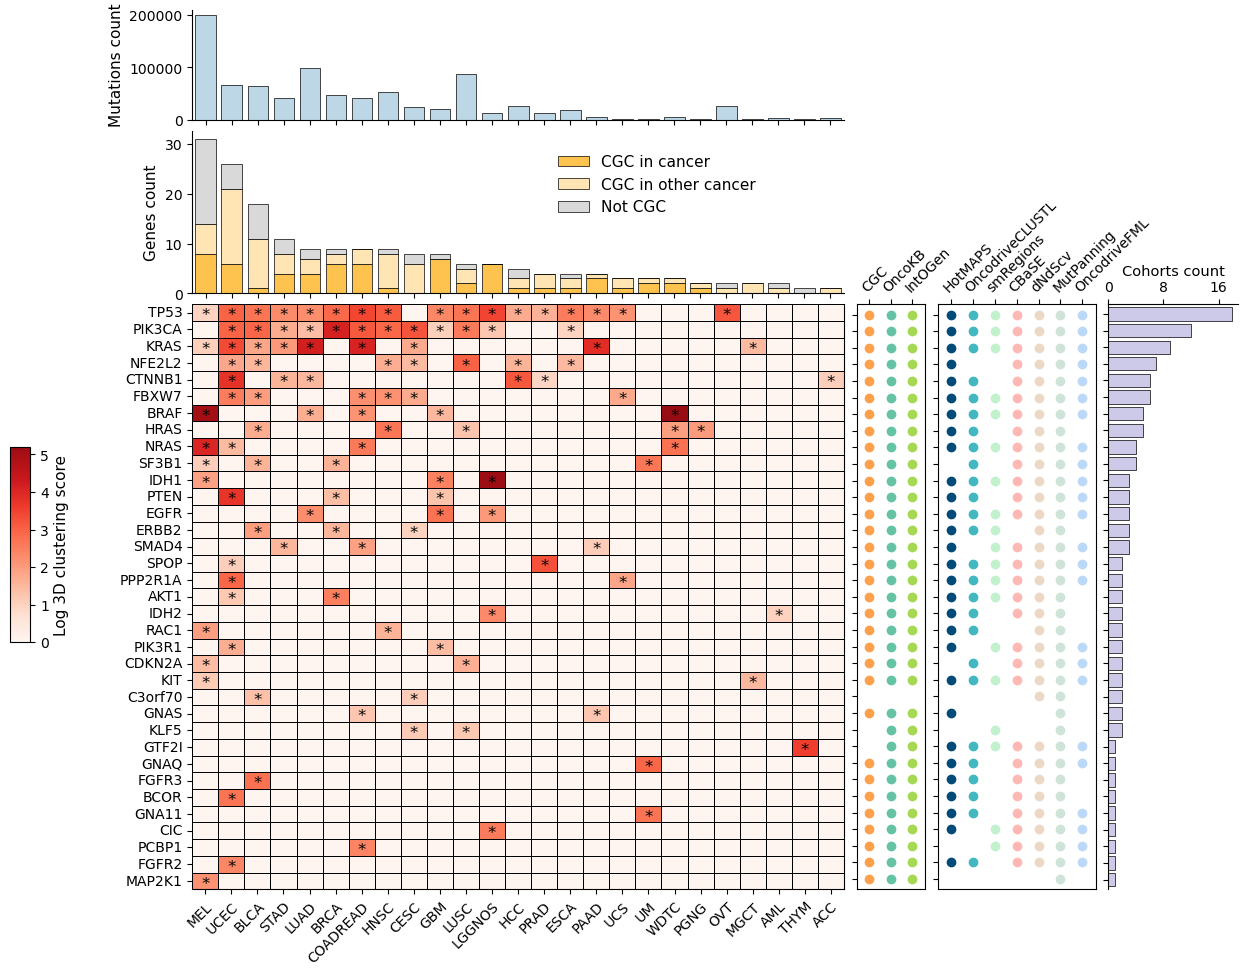

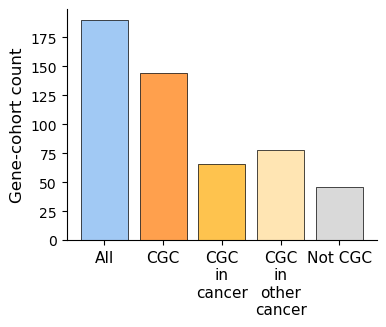

In [377]:
# Mut count (top track)

top_cohorts_n=None
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=False,
                                                                                             sort_by_score_only=False)

# display(cohort_hits_count)
df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.5,13),
               width_ratios=[0.95, 0.1, 0.23, 0.19],
               height_ratios=[0.17, 0.17, 0.25, 0.9],
               cbar_loc=[-0.01, 0.3, 0.015, .15],
               legend_box=(-2.6, 1.28),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.3,
               ax8_xmargin=0.1,
               wspace=0.05, 
               hspace=0.045,
               plot_cohort_count_top=False,
               plot_max_score=False,
               filename="../../figures_and_tables/main/f5/f5a.landscape_tcga.png")
               #st_annot_dbs=["cgc", "oncokb", "fondone", "msk_impact", "vogelstein", "intogen"])

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df, filename="../../figures_and_tables/main/f5/f5b.landscape_tcga_summary.png")

#### All cohorts

Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


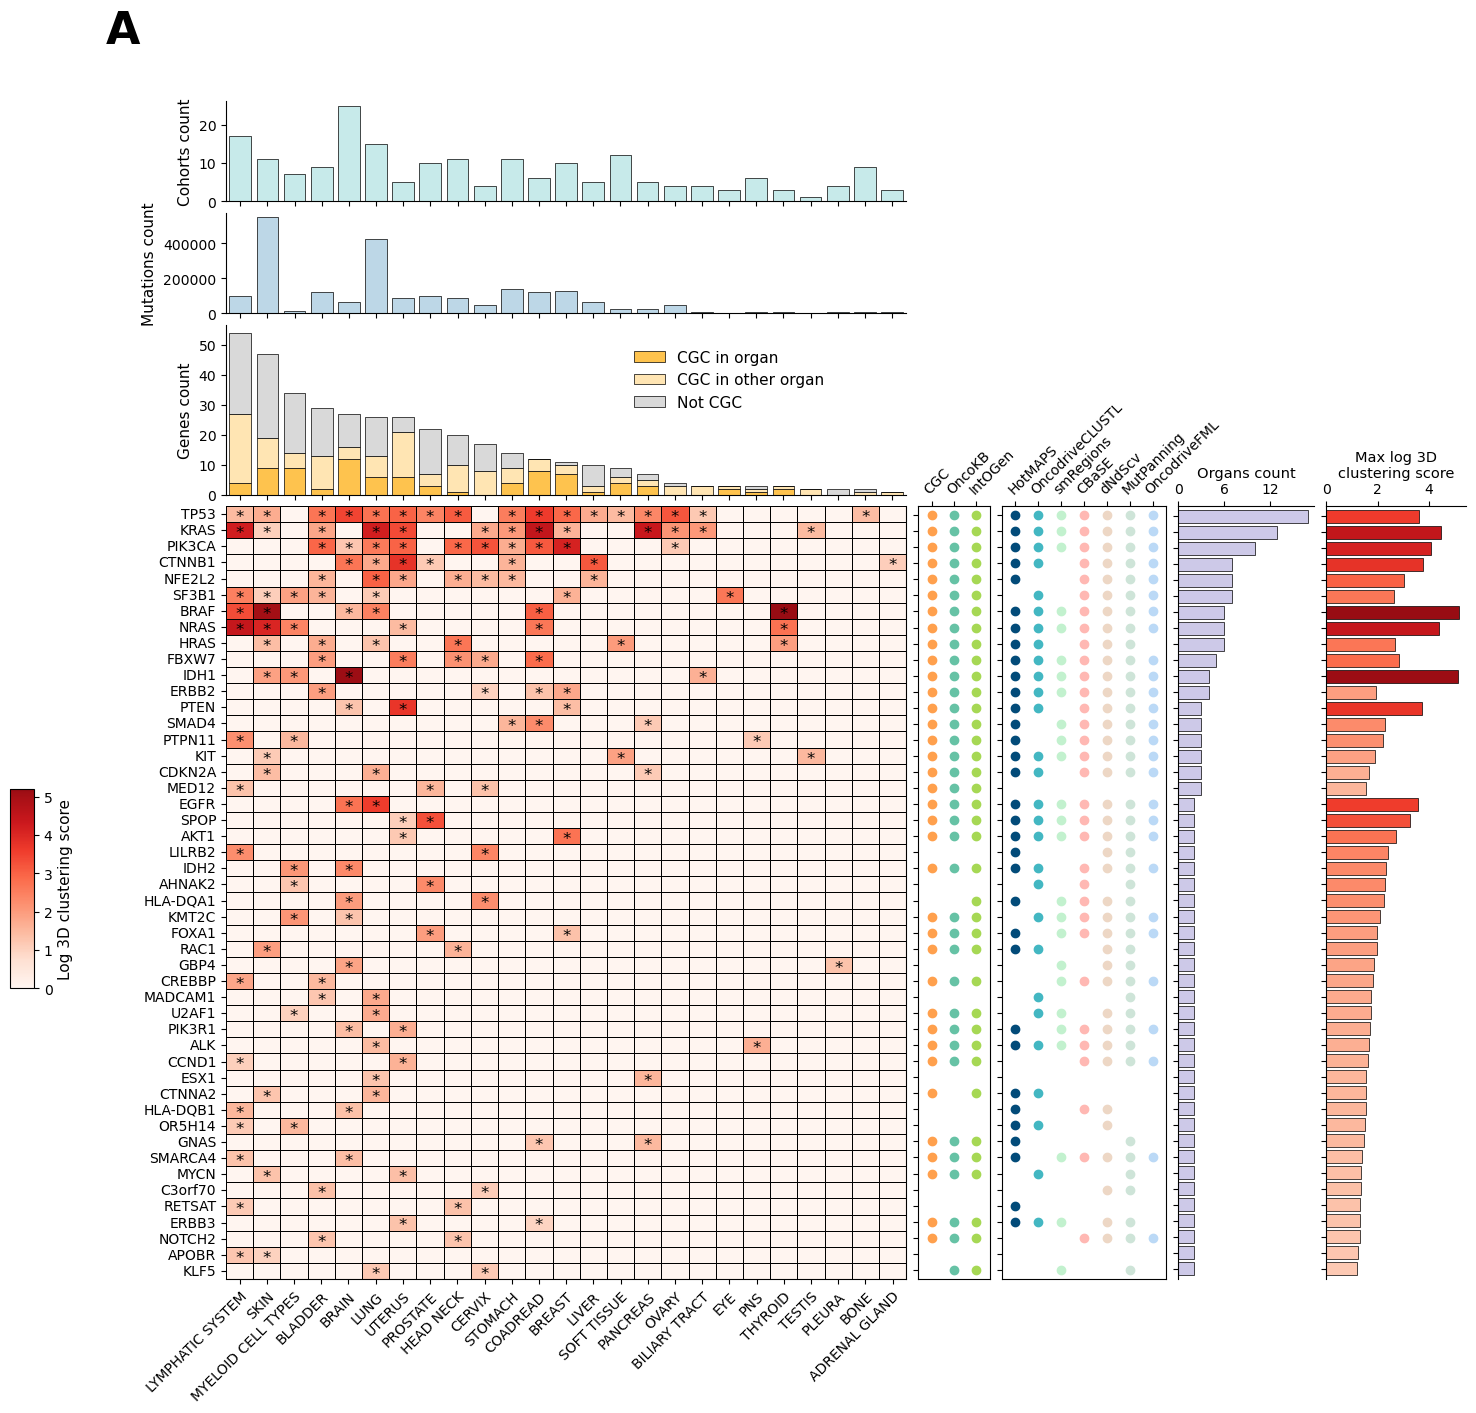

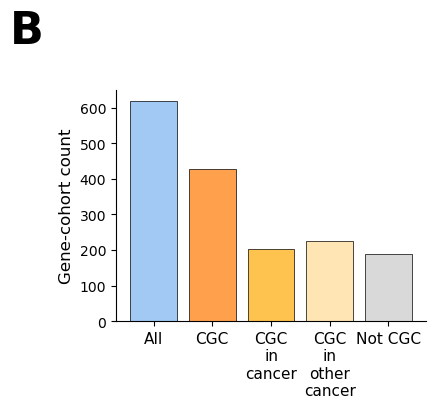

In [378]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=True,
                                                                                             sort_by_score_only=False)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("LYMPH", "LYMPHATIC SYSTEM") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("MYELOID", "MYELOID CELL TYPES") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,15.3),
               width_ratios=[0.95, 0.1, 0.23, 0.19, 0.195],
               height_ratios=[0.13, 0.13, 0.22, 1],
               cbar_loc=[-0.01, 0.3, 0.015, .13],
               legend_box=(-3.5, 1.22),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.3,
               ax8_xmargin=0.1,
               wspace=0.05, 
               hspace=0.04,
               plot_max_score=True,
               plot_cohort_count_top=True,
               log_mut_count=False,
               grouped_by_organ=True,
               filename="../../figures_and_tables/supplementary/s8/s8a.landscape_all_cohorts.png",
               letter="A")

plot_o3d_cgc_hits(
    hits_df, filename="../../figures_and_tables/supplementary/s8/s8b.landscape_all_cohorts.summary.png",
    letter="B"
    )

#### Genes detected in only one cohort

Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


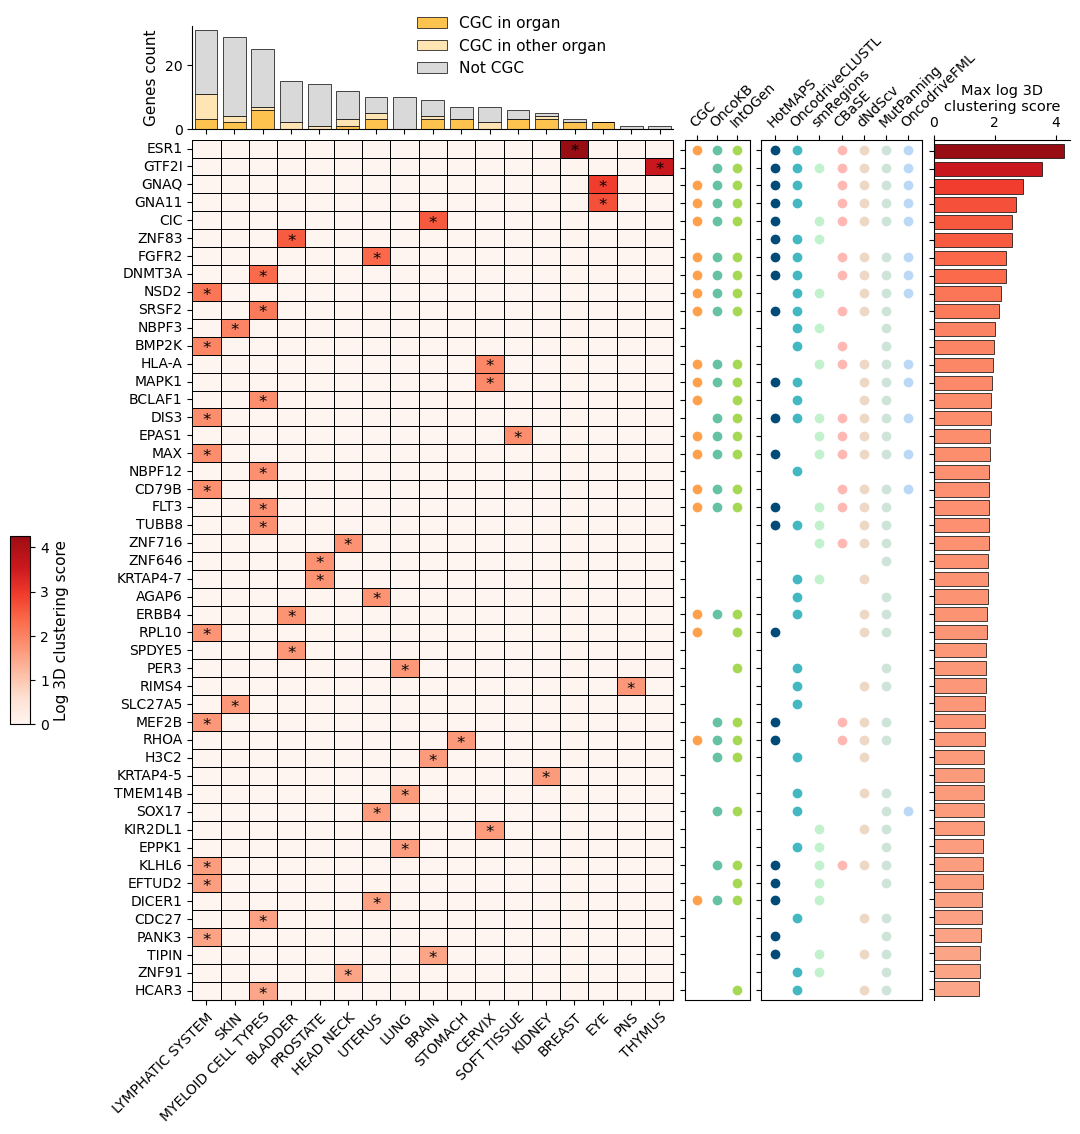

In [379]:
top_cohorts_n=None
top_genes_n=48

genes_one_cohort = genetable[genetable.o3d_qval < 0.01].Gene.value_counts()
genes_one_cohort = genes_one_cohort[genes_one_cohort == 1].index.unique()
genetable_one_cohort = genetable[genetable.Gene.isin(genes_one_cohort)]
genetable_one_cohort = genetable[genetable.Gene.isin(genes_one_cohort)]
df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_one_cohort, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=True,
                                                                                             sort_by_score_only=False)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("LYMPH", "LYMPHATIC SYSTEM") for cancer in df_anomaly.columns]
df_anomaly.columns = [cancer.replace("MYELOID", "MYELOID CELL TYPES") for cancer in df_anomaly.columns]
annot_df_one = get_annot_gene_df(df_binary.index, genetable_one_cohort, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df_one,
               df_anomaly=df_anomaly,
               figsize=(13.5,14.5),
               width_ratios=[0.6, 0.08, 0.2, 0.17, 0.195],
               height_ratios=[0.13, 0.01, 0.12, 1],
               cbar_loc=[-0.01, 0.3, 0.015, .13],
               legend_box=(-2.3, 1.16),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.3,
               ax8_xmargin=0.1,
               wspace=0.06, 
               hspace=0.04,
               plot_max_score=True,
               plot_cohort_count_top=False,
               plot_cohort_count_right=False,
               plot_mut_count=False,
               log_mut_count=False,
               grouped_by_organ=True,
               filename="../../figures_and_tables/supplementary/s9/s9.landscape_all_cohorts_detected_once.png")

# 2) T1, T2, T3: Tables

## Table counts

In [380]:
# Table with all counts

lst_counts = []

hits_tcga = genetable_subset[genetable_subset["o3d_qval"] < 0.01]
cgc_tcga, fishy_tcga = hits_tcga[["CGC", "Fish"]].sum().values
new_tcga = len(hits_tcga[(hits_tcga["CGC"] == 0) & (hits_tcga["Fish"] == 0)])
lst_counts.append((len(hits_tcga), cgc_tcga, fishy_tcga, new_tcga, "Gene-Cohort", "TCGA"))

hits_tcga_unique = hits_tcga[["Gene", "CGC", "Fish"]].drop_duplicates()
cgc_tcga_unique, fishy_tcga_unique = hits_tcga_unique.drop(columns=["Gene"]).sum().values
new_tcga_unique = len(hits_tcga_unique[(hits_tcga_unique["CGC"] == 0) & (hits_tcga_unique["Fish"] == 0)])
lst_counts.append((len(hits_tcga.Gene.unique()), cgc_tcga_unique, fishy_tcga_unique, new_tcga_unique, "Gene", "TCGA"))

hits_all = genetable[genetable["o3d_qval"] < 0.01]
cgc_all, fishy_all = hits_all[["CGC", "Fish"]].sum().values
new_all = len(hits_all[(hits_all["CGC"] == 0) & (hits_all["Fish"] == 0)])
lst_counts.append((len(hits_all), cgc_all, fishy_all, new_all, "Gene-Cohort", "All"))

hits_all_unique = hits_all[["Gene", "CGC", "Fish"]].drop_duplicates()
cgc_all_unique, fishy_all_unique = hits_all_unique.drop(columns=["Gene"]).sum().values
new_all_unique = len(hits_all_unique[(hits_all_unique["CGC"] == 0) & (hits_all_unique["Fish"] == 0)])
lst_counts.append((len(hits_all.Gene.unique()), cgc_all_unique, fishy_all_unique, new_all_unique, "Gene", "All"))

counts_df = pd.DataFrame(lst_counts, columns=["TOTAL", "CGC", "FISHY", "NOT ANNOTATED", "COUNT TYPE", "COHORT"])
# counts_df.to_csv("../../figures_and_tables/tables/detected_counts.tsv", index=False, sep="\t")
counts_df

,TOTAL,CGC,FISHY,NOT ANNOTATED,COUNT TYPE,COHORT
0,190,144,1,45,Gene-Cohort,TCGA
1,103,59,1,43,Gene,TCGA
2,619,429,15,175,Gene-Cohort,All
3,273,106,14,154,Gene,All


## T1: cohorts

In [381]:
cohort_df_table = cohort_df.copy()
cohort_df_table = cohort_df_table.rename(columns={"GENERAL_CANCER_TYPE" : "ORGAN", "CANCER_TYPE" : "CANCER"})
cohort_df_table.ORGAN = cohort_df_table.ORGAN.str.replace("_", " ")
cohort_df_table.ORGAN = cohort_df_table.ORGAN.str.replace("LYMPH", "LYMPHATIC SYSTEM")
cohort_df_table.ORGAN = cohort_df_table.ORGAN.str.replace("MYELOID", "MYELOID CELL TYPES")
cohort_df_table.COHORT = cohort_df_table.COHORT.str.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
cohort_df_table.ORGAN = cohort_df_table.ORGAN.str.replace("_", " ")
cohort_df_table.ORGAN = cohort_df_table.ORGAN.str.replace("SOFT TISSUE", "SARC")

cohort_df_table.insert(2, "ORGAN", cohort_df_table.pop("ORGAN"))
cohort_df_table = cohort_df_table.sort_values(["ORGAN", "CANCER", "SAMPLES"], ascending=[True, True, False]).reset_index(drop=True)
cohort_df_table.insert(3, "PROVENANCE", cohort_df_table.COHORT.apply(lambda x: x.split("_")[0]))
cohort_df_table

,COHORT,CANCER,ORGAN,PROVENANCE,PLATFORM,MUTATIONS,SAMPLES
0,TCGA_WXS_ACC,ACC,ADRENAL GLAND,TCGA,WXS,11660,91
1,STJUDE_WGS_D_ACC_2018,ACC,ADRENAL GLAND,STJUDE,WGS,17560,20
2,PEDCBIOP_WXS_ACC_PRY,ACC,ADRENAL GLAND,PEDCBIOP,WXS,239,8
3,HARTWIG_WGS_ANSC_2023,ANSC,ANSC,HARTWIG,WGS,438154,21
4,HARTWIG_WGS_CHOL_2023,CHOL,BILIARY TRACT,HARTWIG,WGS,1378086,80
...,...,...,...,...,...,...,...
210,CPTAC_WXS_UCEC_2020,UCEC,UTERUS,CPTAC,WXS,219950,101
211,PCAWG_WGS_UTERUS_ADENOCA,UCEC,UTERUS,PCAWG,WGS,1086089,44
212,HARTWIG_WGS_UCEC_2023,UCEC,UTERUS,HARTWIG,WGS,1171774,32
213,TCGA_WXS_UCS,UCS,UTERUS,TCGA,WXS,10409,57


In [382]:
# Add CH cohorts
ch_cohorts_path = f"{datasets}/input/ch"
for cohort in os.listdir(f"{ch_cohorts_path}/maf"):
    print(cohort, len(pd.read_csv(f"{ch_cohorts_path}/maf/{cohort}")))

cohort_ch_df = pd.DataFrame({"COHORT" : ["OTHER_WGS_HMF_FULL", 
                                         "OTHER_WXS_CH_IMPACT_PANEL", 
                                         "OTHER_WXS_TCGA_FULL"], 
                             "CANCER" : ["CH", "CH", "CH"],
                             "ORGAN"  : ["BLOOD", "BLOOD", "BLOOD"],
                             "PROVENANCE" : ["HARTWIG", "MSK_IMPACT", "TCGA"],
                             "PLATFORM": ["WGS", "PANEL", "WXS"],
                             "MUTATIONS" : [np.nan, np.nan, np.nan],
                              "SAMPLES" : [3785, 24146, 8530]})
cohort_ch_df

OTHER_WGS_HMF_FULL.in.maf 34787
OTHER_WXS_CH_IMPACT_PANEL.in.maf 9179
OTHER_WXS_TCGA_FULL.in.maf 401922


,COHORT,CANCER,ORGAN,PROVENANCE,PLATFORM,MUTATIONS,SAMPLES
0,OTHER_WGS_HMF_FULL,CH,BLOOD,HARTWIG,WGS,NaN,3785
1,OTHER_WXS_CH_IMPACT_PANEL,CH,BLOOD,MSK_IMPACT,PANEL,NaN,24146
2,OTHER_WXS_TCGA_FULL,CH,BLOOD,TCGA,WXS,NaN,8530


In [383]:
cohort_df_table = pd.concat((cohort_df_table, cohort_ch_df)).reset_index(drop=True)
cohort_df_table.to_csv("../../figures_and_tables/tables/t1.cohorts.tsv", index=False, sep="\t")
cohort_df_table

,COHORT,CANCER,ORGAN,PROVENANCE,PLATFORM,MUTATIONS,SAMPLES
0,TCGA_WXS_ACC,ACC,ADRENAL GLAND,TCGA,WXS,11660.0,91
1,STJUDE_WGS_D_ACC_2018,ACC,ADRENAL GLAND,STJUDE,WGS,17560.0,20
2,PEDCBIOP_WXS_ACC_PRY,ACC,ADRENAL GLAND,PEDCBIOP,WXS,239.0,8
3,HARTWIG_WGS_ANSC_2023,ANSC,ANSC,HARTWIG,WGS,438154.0,21
4,HARTWIG_WGS_CHOL_2023,CHOL,BILIARY TRACT,HARTWIG,WGS,1378086.0,80
...,...,...,...,...,...,...,...
213,TCGA_WXS_UCS,UCS,UTERUS,TCGA,WXS,10409.0,57
214,CBIOP_WXS_VSC_CUK_2018,VULVA,VULVA,CBIOP,WXS,3035.0,15
215,OTHER_WGS_HMF_FULL,CH,BLOOD,HARTWIG,WGS,NaN,3785
216,OTHER_WXS_CH_IMPACT_PANEL,CH,BLOOD,MSK_IMPACT,PANEL,NaN,24146


## Table organs

In [384]:
def init_organs_table(x):

    tot_samples = x.SAMPLES.sum()
    tot_mutations = x.MUTATIONS.sum()
    lst_ttypes = (", ").join(x.CANCER_TYPE.unique())
    num_cohorts = len(x.COHORT)
    lst_cohorts = (", ").join(x.COHORT)

    return pd.Series({
        'SAMPLES': tot_samples,
        'MUTATIONS': tot_mutations,
        "COHORTS COUNT" : num_cohorts,
        'COHORTS': lst_cohorts,
        'CANCER': lst_ttypes
    })


def add_genes_to_organ_tables(df_binary, organ_table):

    detected_genes = {}
    for organ in df_binary.columns:
        detected_genes[organ] = ", ".join(df_binary.index[df_binary[organ] == 1].tolist())
    
    organ_table["DETECTED GENES"] = organ_table.ORGAN.apply(lambda x: detected_genes[x] if x in detected_genes else np.nan)
    
    return organ_table


def rearrenge_organ_table(organ_table):

    organ_table.ORGAN = organ_table.ORGAN.str.replace("_", " ").replace("LYMPH", "LYMPHATIC SYSTEM").replace("MYELOID", "MYELOID CELL TYPES")
    cols = ["ORGAN", 
            "CANCER", 
            "COHORTS",
            "COHORTS COUNT", 
            "SAMPLES", 
            "MUTATIONS", 
            "MUTATIONS IN CLUSTERS", 
            "DETECTED GENES COUNT", 
            "DETECTED GENES"]
    organ_table = organ_table[cols].sort_values("DETECTED GENES COUNT", ascending=False).reset_index(drop=True)
    
    return organ_table
    

def get_organ_table(df_binary, cohort_hits_count, cohorts_df):

    organ_table = cohorts_df.groupby("GENERAL_CANCER_TYPE").apply(lambda x: init_organs_table(x)).reset_index()
    organ_table = organ_table.rename(columns={"GENERAL_CANCER_TYPE" : "ORGAN"})
    
    organ_table_cohorts = cohort_hits_count[["Clust_mut", "Oncodrive3D", "Cohort_count"]].reset_index().rename(
    columns={"General_cancer" : "ORGAN", 
             "Clust_mut" : "MUTATIONS IN CLUSTERS", 
             "Oncodrive3D" : "DETECTED GENES COUNT"}).drop(columns=["Cohort_count"])

    organ_table_final = organ_table.merge(organ_table_cohorts, on="ORGAN", how="left")
    organ_table_final = add_genes_to_organ_tables(df_binary, organ_table_final)
    organ_table_final = rearrenge_organ_table(organ_table_final)

    return organ_table_final


def get_mut_count(cohorts_df, o3d_output_dir):

    lst_dfs = []

    for cohort, ttype in cohorts_df[["COHORT", "GENERAL_CANCER_TYPE"]].values:
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        path_csv = f"{o3d_output_dir}/{cohort}/{cohort}.mutations.processed.tsv"
        if os.path.exists(path_csv):
            df_mut = pd.read_table(path_csv)
            df_mut["Cohort"] = cohort
            lst_dfs.append(df_mut[["Gene", "Cohort"]])
        else:
            print(f"Path doesn't exist: {path_csv}")

    return pd.concat(lst_dfs)

In [385]:
_, df_binary, _, _, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                 cohort_df, 
                                                                 o3d_output_dir=o3d_output_dir,
                                                                 top_cohorts_n=None, 
                                                                 top_genes_n=None, 
                                                                 cgc_df=cgc_df, 
                                                                 cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                 grouped_by_organ=True,
                                                                 sort_by_score_only=True)

organ_table = get_organ_table(df_binary, cohort_hits_count, cohort_df)
organ_table.ORGAN = organ_table.ORGAN.str.replace("SOFT TISSUE", "SARC")
organ_table = organ_table.drop(columns=["MUTATIONS IN CLUSTERS", "DETECTED GENES COUNT", "DETECTED GENES"])
organ_table = organ_table.sort_values("ORGAN").reset_index(drop=True)
# organ_table.to_csv("../../figures_and_tables/tables/organs.tsv", index=False, sep="\t")
organ_table

Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


,ORGAN,CANCER,COHORTS,COHORTS COUNT,SAMPLES,MUTATIONS
0,ADRENAL GLAND,ACC,"STJUDE_WGS_D_ACC_2018, PEDCBIOP_WXS_ACC_PRY, T...",3,119,29459
1,ANSC,ANSC,HARTWIG_WGS_ANSC_2023,1,21,438154
2,BILIARY TRACT,"GBC, CHOL","HARTWIG_WGS_GBC_2023, HARTWIG_WGS_CHOL_2023, P...",4,172,2340962
3,BLADDER,"BLCA, UTUC, BLADDER","HARTWIG_WGS_BLCA_2023, CBIOP_WXS_BLCA_VALLEN_2...",9,817,7267545
4,BONE,"OS, ES","STJUDE_WGS_M_OS_2018, STJUDE_WGS_D_OS_2018, ST...",9,368,274056
5,BRAIN,"EPM, GB, MBL, GBM, HGGNOS, LGGNOS, MT, PAST, ATRT","STJUDE_WGS_D_EPD_2018, HARTWIG_WGS_GB_2023, ST...",25,2712,7258651
6,BREAST,BRCA,"CBIOP_WXS_BRCA_MBCP_PRY_NOTREAT_2020, CBIOP_WX...",10,2528,16080062
7,CERVIX,"CEAD, CESC","HARTWIG_WGS_CEAD_2023, CGCI_WGS_CESC_2020, PCA...",4,471,9683820
8,COADREAD,"COADREAD, COAD, READ","HARTWIG_WGS_COADREAD_2023, HARTWIG_WGS_COAD_20...",6,1398,44567832
9,CUP,NETNOS,HARTWIG_WGS_NETNOS_2023,1,23,415945


## T3: genes-cohorts

In [397]:
def get_all_o3d_gene_result(cohort_df, o3d_output_dir):

    lst_df = []
    for cohort in cohort_df["COHORT"].values:
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        path_csv = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        if os.path.exists(path_csv):
            df_o3d = pd.read_csv(path_csv)
            lst_df.append(df_o3d)
        else:
            print(f"Path doesn't exist: {path_csv}")

    return pd.concat(lst_df)

o3d_datasets = f"{WORKSPACE}/nobackup/scratch/oncodrive3d/datasets_mane_240506"
seq_df = pd.read_table(f"{o3d_datasets}/seq_for_mut_prob.tsv")[["Gene", "Seq"]]

df_results = get_all_o3d_gene_result(cohort_df, o3d_output_dir)
df_results.Cohort = df_results.Cohort.str.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
df_results = df_results[["Gene", "Uniprot_ID", "O3D_transcript_ID", "Cohort", "Score_obs_sim_top_vol", "pval", "qval", "Clust_res", "C_pos", "C_label", "Clust_mut", "Mut_in_gene"]]
df_results = df_results[df_results["qval"] < 0.01].reset_index(drop=True)
df_results = df_results.merge(cohort_df_table[["COHORT", "CANCER", "ORGAN"]].rename(columns={"COHORT" : "Cohort"}), on="Cohort", how="left")

# Proportion of significant residues
df_results = df_results.merge(seq_df, on="Gene", how="left")
df_results["Len_protein"] = df_results.apply(lambda x: len(x.Seq), axis=1)
df_results["Ratio_clust_res"] = df_results["Clust_res"] / df_results["Len_protein"] 
df_results = df_results.drop(columns=["Seq", "Len_protein"])

# Clusters
df_results['C_pos'] = df_results['C_pos'].apply(lambda x: np.sort(list(map(int, x.strip('[]').split()))))
df_results["C_pos"] = df_results["C_pos"].apply(lambda lst: ", ".join(map(str, lst)))
df_results['N_clusters'] = df_results['C_label'].apply(lambda x: len(np.unique(list(map(float, x.strip('[]').split())))))

# Annotations
annot_df = get_annot_gene_df(df_results.Gene.unique(), genetable, uniq_drivers_df, oncokb_df, cgc_df)
df_results = df_results.merge(annot_df[["Gene", "cgc", "oncokb", "intogen"]].replace({1: "YES", 0: "NO"}), how="left")

# Parse
rename_cols = {"Gene" : "GENE", 
               "Uniprot_ID" : "UNIPROT ID",
               "O3D_transcript_ID" : "TRANSCRIPT ID", 
               "Cohort" : "COHORT",
               "CANCER" : "CANCER",
               "ORGAN" : "ORGAN",
               "Score_obs_sim_top_vol" : "3D CLUSTERING SCORE",
               "pval" : "PVALUE", 
               "qval" : "QVALUE",
               "Clust_res" : "NUMBER OF CLUSTERS",
               "Ratio_clust_res" : "RATIO OF SIGNIFICANT RESIDUE",
               "N_clusters" : "NUMBER OF CLUMPS",
               "C_pos" : "LOCATION OF CLUSTERS", 
               "Clust_mut" : "MUTATIONS IN CLUSTERS",
               "Mut_in_gene" : "TOTAL MUTATIONS",
               "cgc" : "CGC", 
               "oncokb" : "ONCOKB", 
               "intogen" : "INTOGEN"}

df_results = df_results.rename(columns=rename_cols)[list(rename_cols.values())]
df_results["NUMBER OF CLUSTERS"] = df_results["NUMBER OF CLUSTERS"].astype(int)
df_results["MUTATIONS IN CLUSTERS"] = df_results["MUTATIONS IN CLUSTERS"].astype(int)

genes_by_cohort = df_results.groupby("GENE").apply(lambda x: len(x)).sort_values().reset_index().rename(columns={0 : "Cohorts_detected"})
df_results = df_results.merge(genes_by_cohort, on="GENE")

# Sort
gene_max_score = df_results.groupby('GENE')['Cohorts_detected'].transform('max')
df_results = df_results.assign(MaxScore=gene_max_score).sort_values(
    by=['MaxScore', 'GENE', 'Cohorts_detected', '3D CLUSTERING SCORE'], ascending=[False, True, False, False]).drop(
    columns=['MaxScore', 'Cohorts_detected']).reset_index(drop=True)

df_results = df_results.drop(columns=["RATIO OF SIGNIFICANT RESIDUE", "NUMBER OF CLUMPS"])
df_results.to_csv("../../figures_and_tables/tables/t3.detected_genes_cohorts.tsv", index=False, sep="\t")
df_results[:20]

Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


,GENE,UNIPROT ID,TRANSCRIPT ID,COHORT,CANCER,ORGAN,3D CLUSTERING SCORE,PVALUE,QVALUE,NUMBER OF CLUSTERS,LOCATION OF CLUSTERS,MUTATIONS IN CLUSTERS,TOTAL MUTATIONS,CGC,ONCOKB,INTOGEN
0,TP53,K7PPA8,ENST00000269305,HARTWIG_WGS_COADREAD_2023,COADREAD,COADREAD,37.386387,0.0,0.0,62,"109, 110, 113, 120, 124, 127, 132, 134, 135, 1...",261,266,YES,YES,YES
1,TP53,K7PPA8,ENST00000269305,TCGA_WXS_LGGNOS,LGGNOS,BRAIN,31.603613,0.0,0.0,71,"109, 110, 113, 120, 125, 126, 127, 130, 131, 1...",245,246,YES,YES,YES
2,TP53,K7PPA8,ENST00000269305,TCGA_WXS_COADREAD,COADREAD,COADREAD,31.338921,0.0,0.0,49,"113, 124, 127, 130, 132, 133, 135, 138, 141, 1...",207,224,YES,YES,YES
3,TP53,K7PPA8,ENST00000269305,TCGA_WXS_OVT,OVT,OVARY,24.296052,0.0,0.0,67,"105, 110, 125, 127, 130, 131, 132, 134, 135, 1...",227,229,YES,YES,YES
4,TP53,K7PPA8,ENST00000269305,TCGA_WXS_HNSC,HNSC,HEAD NECK,22.251089,0.0,0.0,70,"105, 106, 110, 125, 126, 127, 132, 133, 134, 1...",234,245,YES,YES,YES
5,TP53,K7PPA8,ENST00000269305,TCGA_WXS_UCEC,UCEC,UTERUS,19.971393,0.0,0.0,47,"126, 127, 130, 134, 135, 138, 141, 157, 158, 1...",134,137,YES,YES,YES
6,TP53,K7PPA8,ENST00000269305,HARTWIG_WGS_BRCA_2023,BRCA,BREAST,18.416195,0.0,0.0,64,"110, 111, 125, 127, 132, 133, 134, 135, 138, 1...",181,187,YES,YES,YES
7,TP53,K7PPA8,ENST00000269305,TCGA_WXS_BRCA,BRCA,BREAST,17.942296,0.0,0.0,65,"107, 111, 113, 126, 127, 130, 132, 133, 135, 1...",211,215,YES,YES,YES
8,TP53,K7PPA8,ENST00000269305,HARTWIG_WGS_NSCLC_2023,NSCLC,LUNG,15.691384,0.0,0.0,71,"105, 107, 110, 124, 125, 127, 130, 132, 135, 1...",204,219,YES,YES,YES
9,TP53,K7PPA8,ENST00000269305,TCGA_WXS_LUSC,LUSC,LUNG,14.640403,0.0,0.0,71,"105, 106, 109, 110, 111, 125, 126, 131, 132, 1...",249,259,YES,YES,YES


## Extended gene table 

In [217]:
def get_genes_mut_count(cohorts_df, o3d_output_dir):

    lst_dfs = []

    for cohort, ttype in cohorts_df[["COHORT", "GENERAL_CANCER_TYPE"]].values:
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        path_csv = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        if os.path.exists(path_csv):
            df_o3d = pd.read_csv(path_csv)
            lst_dfs.append(df_o3d[["Gene", "Uniprot_ID", 'O3D_transcript_ID', "Mut_in_gene", "Clust_mut", "Clust_res", "Cohort"]])
        else:
            print(f"Path doesn't exist: {path_csv}")

    df = pd.concat(lst_dfs)

    df['Clust_mut'] = df['Clust_mut'].replace(0, np.nan)
    df['Clust_res'] = df['Clust_res'].replace(0, np.nan)
    
    df["Per_res_cluster_mut"] = df.Clust_mut / df.Clust_res
    df["Per_res_cluster_mut"] = df["Per_res_cluster_mut"].round(2)

    return df


def init_gene_table(x):

    uni_id = x.Uniprot_ID.unique()[0]
    tr_id = x.O3D_transcript_ID.unique()[0]
    mut_in_gene = x.Mut_in_gene.sum()
    clust_mut = x.Clust_mut.sum()
    mean_clust_res = x.Clust_res.mean()
    mean_per_res_cluster_mut = x.Per_res_cluster_mut.mean()

    return pd.Series({
        'Uniprot ID': uni_id,
        'ENSEMBL Transcript ID': tr_id,
        "# Mutations" : mut_in_gene,
        '# Mutations in clusters': clust_mut,
        'Average residues in clusters': mean_clust_res,
        'Average per-residues cluster mutations': mean_per_res_cluster_mut
    })
    

def get_cohort_for_gene_table(df_binary, gene_table):

    detected_cohorts = {}
    for gene in df_binary.index:
        
        df_binary_gene = df_binary[df_binary.index == gene]
        gene_cohorts = df_binary_gene.columns[(df_binary_gene == 1).values[0]]
        detected_cohorts[gene] = ", ".join(gene_cohorts)

    return gene_table.Gene.apply(lambda x: detected_cohorts[x] if x in detected_cohorts else np.nan)


def rearrenge_gene_table(gene_table):

    cols = ["Gene", 
            "Uniprot ID", 
            "ENSEMBL Transcript ID", 
            "# Mutations", 
            "# Mutations in clusters", 
            "Ratio mutations in clusters", 
            "Average residues in clusters", 
            "Average per-residues cluster mutations",
            "Max Log 3D clustering score",
            "# Significant organs",
            "Significant organs", 
            "# Significant cohorts",
            "Significant cohorts",
            "Databases",
            "IntOGen methods"
            ]
    gene_table = gene_table[cols].sort_values("# Significant cohorts", ascending=False).reset_index(drop=True)
    gene_table = gene_table.rename(columns={"# Significant organs" : "# Organs where significant",
                                            "Significant organs" : "Organs where significant",
                                            "# Significant cohorts" : "# Cohorts where significant",
                                            "Significant cohorts" : "Cohorts where significant"})

    gene_table["# Mutations in clusters"] = gene_table["# Mutations in clusters"].astype(int)
    gene_table["# Organs where significant"] = gene_table["# Organs where significant"].fillna(0).astype(int)
    gene_table["# Cohorts where significant"] = gene_table["# Cohorts where significant"].fillna(0).astype(int)
    
    gene_table["Average residues in clusters"] = gene_table["Average residues in clusters"].round(2)
    gene_table["Average per-residues cluster mutations"] = gene_table["Average per-residues cluster mutations"].round(2)
    gene_table["Max Log 3D clustering score"] = gene_table["Max Log 3D clustering score"].round(2)
    
    return gene_table


def get_annot_for_gene_table(df_binary, gene_table):

    gene_annots = {}
    for gene in df_binary.Gene:
        
        df_binary_gene = df_binary[df_binary.Gene == gene]
        gene_annot = df_binary_gene.columns[(df_binary_gene == 1).values[0]]
        gene_annots[gene] = ", ".join(gene_annot)

    return gene_table.Gene.apply(lambda x: gene_annots[x] if x in gene_annots else np.nan)


def get_gene_table(cohorts_df, o3d_output_dir, df_binary_organ, df_binary_cohort, df_anomaly, annot_df, annot_names_dict):

    gene_table = get_genes_mut_count(cohorts_df, o3d_output_dir)
    gene_table = gene_table.groupby("Gene").apply(lambda x: init_gene_table(x)).reset_index()
    gene_table["Ratio mutations in clusters"] = gene_table["# Mutations in clusters"] / gene_table["# Mutations"]
    gene_table["Ratio mutations in clusters"] = gene_table["Ratio mutations in clusters"].round(2)
    gene_table = gene_table.sort_values("Ratio mutations in clusters", ascending=False).reset_index(drop=True)
    
    gene_table["Significant organs"] = get_cohort_for_gene_table(df_binary_organ, gene_table)
    gene_table["Significant cohorts"] = get_cohort_for_gene_table(df_binary_cohort, gene_table)
    gene_table["# Significant organs"] = gene_table["Significant organs"].apply(lambda x: np.nan if pd.isnull(x) else len(x.split(",")))
    gene_table["# Significant cohorts"] = gene_table["Significant cohorts"].apply(lambda x: np.nan if pd.isnull(x) else len(x.split(",")))

    max_score = df_anomaly.max(1).reset_index().rename(columns = {0 : "Max Log 3D clustering score"})
    gene_table = gene_table.merge(max_score, on="Gene", how="left")

    # Get annot for each gene
    lst_dbs = ["cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
    lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
    
    annot_df = get_annot_gene_df(df_binary_cohort.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)
    annot_df_dbs = annot_df[["Gene"] + lst_dbs]
    annot_df_methods = annot_df[["Gene"] + lst_methods]
    annot_df_dbs.columns = [annot_names_dict[col] if col in annot_names_dict else col for col in annot_df_dbs.columns]
    annot_df_methods.columns = [annot_names_dict[col] if col in annot_names_dict else col for col in annot_df_methods.columns]
    
    gene_table["Databases"] = get_annot_for_gene_table(annot_df_dbs, gene_table).replace("", np.nan)
    gene_table["IntOGen methods"]  = get_annot_for_gene_table(annot_df_methods, gene_table).replace("", np.nan)
    
    return rearrenge_gene_table(gene_table)

In [218]:
_, df_binary_organ, _, _, _ = get_gene_cohorts_binary(genetable, 
                                                     cohort_df, 
                                                     o3d_output_dir=o3d_output_dir,
                                                     top_cohorts_n=None, 
                                                     top_genes_n=None, 
                                                     cgc_df=cgc_df, 
                                                     cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                     grouped_by_organ=True,
                                                     sort_by_score_only=False)

df_anomaly, df_binary_cohort, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                                 cohort_df, 
                                                                                                 o3d_output_dir=o3d_output_dir,
                                                                                                 top_cohorts_n=None, 
                                                                                                 top_genes_n=None, 
                                                                                                 cgc_df=cgc_df, 
                                                                                                 cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                                 grouped_by_organ=False,
                                                                                                 sort_by_score_only=False)

gene_table = get_gene_table(cohort_df, o3d_output_dir, df_binary_organ, df_binary_cohort, df_anomaly, annot_df, names_dict)
gene_table[:10]

Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv
Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


/tmp/ipykernel_2622441/4105329212.py:37: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


,Gene,Uniprot ID,ENSEMBL Transcript ID,# Mutations,# Mutations in clusters,Ratio mutations in clusters,Average residues in clusters,Average per-residues cluster mutations,Max Log 3D clustering score,# Organs where significant,Organs where significant,# Cohorts where significant,Cohorts where significant,Databases,IntOGen methods
0,TP53,K7PPA8,ENST00000269305,6134,5023,0.82,22.43,1.92,3.62,17,"LYMPH, SKIN, BLADDER, BRAIN, LUNG, UTERUS, PRO...",65,"TCGA_WXS_MEL, OTHER_WGS_MM_NATLEUK2018, TCGA_W...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, OncodriveCLUSTL, smRegions, CBaSE, dN..."
1,PIK3CA,P42336,ENST00000263967,2483,1558,0.63,4.39,5.06,4.10,10,"BLADDER, BRAIN, LUNG, UTERUS, HEAD_NECK, CERVI...",35,"TCGA_WXS_UCEC, TCGA_WXS_BLCA, TCGA_WXS_STAD, H...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, OncodriveCLUSTL, smRegions, CBaSE, dN..."
2,KRAS,A0A024RAV5,ENST00000311936,2334,2111,0.90,3.13,13.06,4.48,13,"LYMPH, SKIN, BLADDER, LUNG, UTERUS, CERVIX, ST...",33,"TCGA_WXS_MEL, OTHER_WGS_MM_NATLEUK2018, TCGA_W...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, OncodriveCLUSTL, smRegions, CBaSE, dN..."
3,CTNNB1,A0A024R2Q3,ENST00000349496,837,506,0.60,4.25,4.18,3.77,7,"BRAIN, LUNG, UTERUS, PROSTATE, STOMACH, LIVER,...",19,"TCGA_WXS_UCEC, CBIOP_WXS_PRAD_SU2C_2019, OTHER...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, OncodriveCLUSTL, CBaSE, dNdScv, MutPa..."
4,BRAF,P15056,ENST00000646891,1410,1112,0.79,2.77,12.82,5.19,6,"LYMPH, SKIN, BRAIN, LUNG, COADREAD, THYROID",18,"TCGA_WXS_MEL, OTHER_WGS_MM_NATLEUK2018, OTHER_...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, OncodriveCLUSTL, smRegions, CBaSE, dN..."
5,NRAS,P01111,ENST00000369535,879,731,0.83,3.20,10.54,4.41,6,"LYMPH, SKIN, MYELOID, UTERUS, COADREAD, THYROID",16,"OTHER_WXS_AML_PRY_BEAT_2018, TCGA_WXS_MEL, OTH...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, OncodriveCLUSTL, smRegions, CBaSE, dN..."
6,SMAD4,A0A024R274,ENST00000342988,415,164,0.40,6.08,1.88,2.28,3,"STOMACH, COADREAD, PANCREAS",10,"TCGA_WXS_STAD, HARTWIG_WGS_COADREAD_2023, TCGA...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, smRegions, CBaSE, dNdScv, MutPanning,..."
7,SPOP,O43791,ENST00000504102,337,216,0.64,6.90,3.07,3.27,2,"UTERUS, PROSTATE",10,"TCGA_WXS_UCEC, CBIOP_WXS_PRAD_SU2C_2019, OTHER...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, OncodriveCLUSTL, smRegions, CBaSE, dN..."
8,NFE2L2,Q16236,ENST00000397062,373,212,0.57,5.44,2.14,3.02,7,"BLADDER, LUNG, UTERUS, HEAD_NECK, CERVIX, STOM...",10,"TCGA_WXS_UCEC, TCGA_WXS_BLCA, TCGA_WXS_HNSC, T...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","HotMAPS, CBaSE, dNdScv, MutPanning, OncodriveFML"
9,SF3B1,O75533,ENST00000335508,509,149,0.29,3.33,3.76,2.65,7,"LYMPH, SKIN, MYELOID, BLADDER, LUNG, BREAST, EYE",9,"OTHER_WXS_AML_PRY_BEAT_2018, TCGA_WXS_MEL, TCG...","CGC, OncoKB, MSK-IMPACT, FoundationOne, Vogels...","OncodriveCLUSTL, CBaSE, dNdScv, MutPanning, On..."


# 3) S7: Scores and features distributions
## S7a,b: Scores distributions

In [219]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_organ=True,
                                                                                             sort_by_score_only=False)

Path doesn't exist: /data/bbg/projects/clustering_3d/o3d_analysys/datasets//output/cancer_202404/o3d_output/human_mane_raw/run_2024-07-01_16-04-14/PEDCBIOP_WXS_TALL_REL/PEDCBIOP_WXS_TALL_REL.3d_clustering_genes.csv


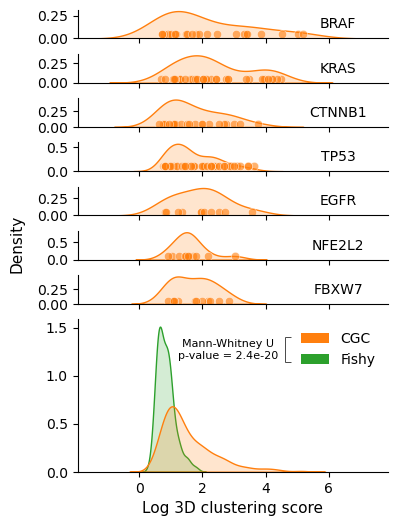

/tmp/ipykernel_2622441/1280173311.py:76: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=o3d_output, x="Annotation", y="Clustering_score", palette=palette, linewidth = 1, alpha = 0.5)


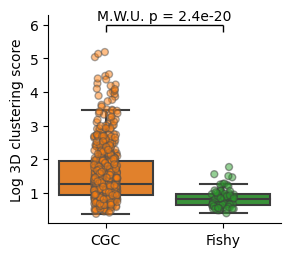

In [220]:
# Score distribution - CGC & Fishy - All cohorts
# ===============================================


# Get df with scores
# ------------------
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output = o3d_output[o3d_output["Annotation"] != "Not annotated"]


# M.W.U. test
# -----------
cgc_score= o3d_output[o3d_output["Annotation"] == "CGC"].Clustering_score.values
fishy_score= o3d_output[o3d_output["Annotation"] == "Fishy"].Clustering_score.values
stat, p_value = stats.mannwhitneyu(cgc_score, fishy_score, alternative='greater')


# Plot
# ----

gene_colors, lut = get_gene_annotation(df_binary, genetable)
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
genes = ["TP53", "KRAS", "PIK3CA", "CTNNB1", "NFE2L2", "BRAF", "EGFR"] # Iter 0
genes = ["TP53", "KRAS", "FBXW7", "SMAD4", "CTNNB1", "NFE2L2", "EGFR", "ERBB2", "BRAF"] # Iter 1
genes = ["TP53", "KRAS", "FBXW7", "CTNNB1", "NFE2L2", "EGFR", "BRAF"] # Iter 1
genes = list(o3d_output[o3d_output.Gene.isin(genes)].groupby("Gene").max("Clustering_score").sort_values("Clustering_score", ascending=False).index)
h_ratios = [0.1 for gene in genes] + [0.53]


fig, ax = plt.subplots(len(h_ratios), 1, 
                       figsize=(4, 6), 
                       gridspec_kw={'height_ratios': h_ratios},
                       sharex=True)

sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2, ax=ax[len(genes)])

for i, gene in enumerate(genes):
    annotation = o3d_output[o3d_output["Gene"] == gene].Annotation.unique()[0]
    sns.kdeplot(data=o3d_output[o3d_output["Gene"] == gene], x='Clustering_score', fill=True, common_norm=False, color=palette[annotation], alpha=0.2, ax=ax[i])

    n = max(ax[i].get_yticks())
    sns.scatterplot(data=o3d_output[o3d_output["Gene"] == gene], x='Clustering_score', y=n*0.1, alpha=0.6, color=palette[annotation], ax=ax[i])
    ax[i].set_ylabel(gene, fontsize=10, rotation=0, va='center')
    ax[i].yaxis.set_label_coords(0.84, 0.5)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
ax[i+1].spines['right'].set_visible(False)
ax[i+1].spines['top'].set_visible(False)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False, fontsize=10)

yshift = -0.01
ax[i+1].vlines(x=4.6, ymin=1.15+yshift, ymax=1.41+yshift, colors='black', linewidth=0.5)
ax[i+1].hlines(y=1.15+yshift, xmin=4.6, xmax=4.8, colors='black', linewidth=0.5)
ax[i+1].hlines(y=1.41+yshift, xmin=4.6, xmax=4.8, colors='black', linewidth=0.5)
plt.text(x=2.8, y=1.16, s=f'Mann-Whitney U\np-value = {p_value:.1e}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Log 3D clustering score', fontsize=11)
ax[len(genes)].set_ylabel("Density", fontsize=11)
ax[len(genes)].yaxis.set_label_coords(-0.17, 1.5)
plt.subplots_adjust(hspace=0.35)
plt.savefig("../../figures_and_tables/supplementary/s7/s7a_top.png", dpi=900, bbox_inches='tight')
plt.show()


# M.W.U. Test plot (not needed)
# =============================
fig, ax = plt.subplots(figsize=(3, 2.7))  
sns.boxplot(data=o3d_output, x="Annotation", y="Clustering_score", palette=palette, showfliers = False)
sns.stripplot(data=o3d_output, x="Annotation", y="Clustering_score", palette=palette, linewidth = 1, alpha = 0.5)
plt.hlines(y=6, xmin=0, xmax=1, colors='black', linewidth=1)
plt.vlines(x=0, ymin=5.8, ymax=6, colors='black', linewidth=1)
plt.vlines(x=1, ymin=5.8, ymax=6, colors='black', linewidth=1)
plt.text(x=0.5, y=6.05, s=f'M.W.U. p = {p_value:.1e}', ha='center', va='bottom', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel(None)
plt.ylabel("Log 3D clustering score")
plt.show()

/tmp/ipykernel_2622441/2004973962.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
/tmp/ipykernel_2622441/2004973962.py:43: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_gene, x='Clustering_score',


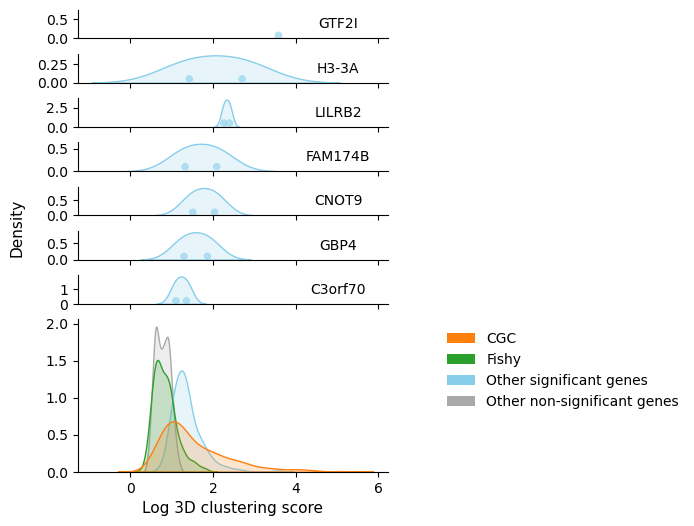

In [221]:
# Score distribution - Annotated and detected - All cohorts - Show only non CGC genes
# ===================================================================================


# Get df with scores with annotations
# -----------------------------------

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])

o3d_output_annot = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output_annot["Annotation"] = o3d_output_annot.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output_annot = o3d_output_annot[o3d_output_annot["Annotation"] != "Not annotated"]

# Get df with scores of not annotated genes
o3d_output_noannot = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
o3d_output_noannot = o3d_output_noannot[o3d_output_noannot["qval"] < 1].reset_index(drop=True)
o3d_output_noannot["Annotation"] = o3d_output_noannot["Annotation"].map({1 : "Other significant genes", 0 : "Other non significant genes"})

o3d_output2 = pd.concat((o3d_output_annot, o3d_output_noannot)).reset_index(drop=True)


# Plot 
# ----
genes = ["GTF2I", "H3-3A", "CNOT9", "LILRB2", "FAM174B", "GBP4", "C3orf70"]
genes = list(o3d_output[o3d_output.Gene.isin(genes)].groupby("Gene").max("Clustering_score").sort_values("Clustering_score", ascending=False).index)

palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], "Other significant genes" : "skyblue", "Other non significant genes" : "darkgray"}
h_ratios = [0.1 for gene in genes] + [0.53]

fig, ax = plt.subplots(len(h_ratios), 1, 
                       figsize=(4, 6), 
                       gridspec_kw={'height_ratios': h_ratios},
                       sharex=True)

sns.kdeplot(data=o3d_output2, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2, ax=ax[len(genes)])

for i, gene in enumerate(genes):
    annotation = o3d_output2[o3d_output2["Gene"] == gene].Annotation.unique()
    data_gene = o3d_output2[(o3d_output2["Gene"] == gene) & (o3d_output2["Annotation"] == 'Other significant genes')]
    annotation = data_gene.Annotation.unique()[0]
    sns.kdeplot(data=data_gene, x='Clustering_score', 
                fill=True, common_norm=False, color=palette[annotation], alpha=0.2, ax=ax[i])
    
    n = max(ax[i].get_yticks())
    sns.scatterplot(data=data_gene, x='Clustering_score', 
                    y=n*0.1, alpha=0.6, hue="Annotation", palette=palette, ax=ax[i], legend=False)
    
    ax[i].set_ylabel(gene, fontsize=10, rotation=0, va='center')
    ax[i].yaxis.set_label_coords(0.84, 0.5)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    y_ticks = np.linspace(0, n, 3)[:2]  
    ax[i].set_yticks(y_ticks)
    
    if gene == "GTF2I":
        ax[i].set_ylim([0, 0.75])

ax[i+1].spines['right'].set_visible(False)
ax[i+1].spines['top'].set_visible(False)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor="skyblue", label="Other significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Other non-significant genes")]
plt.legend(handles=handles, bbox_to_anchor=[0.8,0,1.18,1], frameon=False, fontsize=10)


plt.xlabel('Log 3D clustering score', fontsize=11)
ax[len(genes)].set_ylabel("Density", fontsize=11)
ax[len(genes)].yaxis.set_label_coords(-0.17, 1.6)
plt.subplots_adjust(hspace=0.35)
plt.savefig("../../figures_and_tables/supplementary/s7/s7b_top.png", dpi=900, bbox_inches='tight')
plt.show()

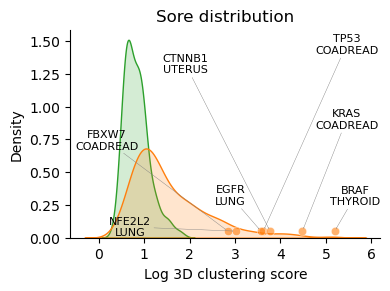

In [222]:
# Max score distribution - CGC & Fishy - All cohorts
# ==================================================


# Get df with scores
# ------------------

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output = o3d_output[o3d_output["Annotation"] != "Not annotated"]

# Get max
idx = o3d_output.groupby("Gene")["Clustering_score"].idxmax()
o3d_output_max = o3d_output.loc[idx].reset_index(drop=True)
o3d_output_max = o3d_output_max.merge(cohort_df[["COHORT", "GENERAL_CANCER_TYPE"]].rename(columns={"COHORT" : "Cohort"}), 
                                      on="Cohort", how="left")

# Plot
# ----

expand_text_xy=(2.63, 3.35)
genes = ["TP53", "KRAS", "PIK3CA", "CTNNB1", "NFE2L2", "BRAF", "EGFR"]
genes = ["TP53", "KRAS", "FBXW7", "CTNNB1", "NFE2L2", "EGFR", "BRAF"]
#non_cgc_genes = ["GTF2I", "H3-3A", "ZNF83", "LILRB2", "AHNAK2", "HLA-DQA1", "GBP4"]


fig, ax = plt.subplots(figsize=(4, 2.7))    
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2, legend=False)

# Text annotations
annotations = []
for i, gene in enumerate(genes):
    o3d_output_gene = o3d_output_max[o3d_output_max["Gene"] == gene]
    ttype = o3d_output_gene.GENERAL_CANCER_TYPE.unique()[0]
    annotation = o3d_output_gene.Annotation.unique()[0]
    sns.scatterplot(data=o3d_output_gene, x='Clustering_score',
                    y=0.05, alpha=0.6, color=palette[annotation])
    annotations.append(ax.text(o3d_output_gene["Clustering_score"], 0.05, f"{gene}\n{ttype}", fontsize=8, color='black'))
adjust_text(annotations, expand=expand_text_xy, 
            arrowprops=dict(arrowstyle='->', color='gray'), lw=0.3, ax=ax)

# Add labels and a legend
plt.xlabel('Log 3D clustering score')
plt.ylabel('Density')
plt.title("Sore distribution", fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("../../figures_and_tables/supplementary/s7/s7a_bottom.png", dpi=900, bbox_inches='tight')
plt.show()

/tmp/ipykernel_2622441/1991897632.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]


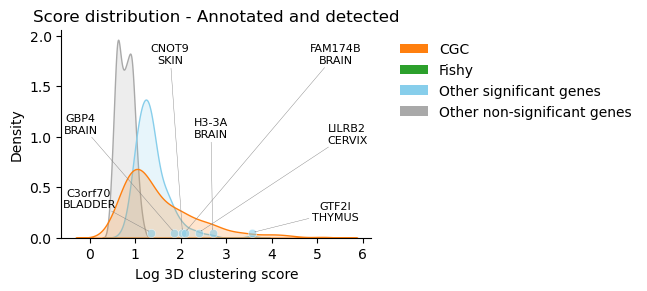

In [223]:
# Score distribution - Annotated and detected - All cohorts
# (Annotated as text is the max score across cohorts)
# =========================================================

# Get df with scores
# ------------------

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])

o3d_output_annot = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output_annot["Annotation"] = o3d_output_annot.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output_annot = o3d_output_annot[o3d_output_annot["Annotation"] != "Not annotated"]

# Get df with scores of not annotated genes
o3d_output_noannot = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
o3d_output_noannot = o3d_output_noannot[o3d_output_noannot["qval"] < 1].reset_index(drop=True)
o3d_output_noannot["Annotation"] = o3d_output_noannot["Annotation"].map({1 : "Other significant genes", 0 : "Other non significant genes"})

o3d_output2 = pd.concat((o3d_output_annot, o3d_output_noannot)).reset_index(drop=True)

# Get max
idx = o3d_output2.groupby("Gene")["Clustering_score"].idxmax()
o3d_output2_max = o3d_output2.loc[idx].reset_index(drop=True)
o3d_output2_max = o3d_output2_max.merge(cohort_df[["COHORT", "GENERAL_CANCER_TYPE"]].rename(columns={"COHORT" : "Cohort"}), 
                                        on="Cohort", how="left")

o3d_output2 = o3d_output2[o3d_output2["Annotation"] != "Fishy"]

# Plot 
# ----

expand_text_xy=(3.6, 3.2)
genes = ["GTF2I", "H3-3A", "CNOT9", "LILRB2", "FAM174B", "GBP4", "C3orf70"]

fig, ax = plt.subplots(figsize=(4, 2.7))     
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], "Other significant genes" : "skyblue", "Other non significant genes" : "darkgray"}
sns.kdeplot(data=o3d_output2, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Text annotations
annotations = []
for i, gene in enumerate(genes):
    o3d_output_gene = o3d_output2_max[o3d_output2_max["Gene"] == gene]
    ttype = o3d_output_gene.GENERAL_CANCER_TYPE.unique()[0]
    annotation = o3d_output_gene.Annotation.unique()
    annotation = annotation[0] if len(annotation) == 1 else 'Other significant genes'
    sns.scatterplot(data=o3d_output_gene, x='Clustering_score',
                    y=0.05, alpha=0.6, color=palette[annotation])
    annotations.append(ax.text(o3d_output_gene["Clustering_score"], 0.05, f"{gene}\n{ttype}", fontsize=8, color='black'))
adjust_text(annotations, expand=expand_text_xy, 
            arrowprops=dict(arrowstyle='->', color='gray'), lw=0.3, ax=ax)

# Add labels and a legend
plt.xlabel('Log 3D clustering score')
plt.ylabel('Density')
plt.title("Score distribution - Annotated and detected", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor="skyblue", label="Other significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Other non-significant genes")]
plt.legend(handles=handles, bbox_to_anchor=[0.7,0,1.18,1], frameon=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("../../figures_and_tables/supplementary/s7/s7b_bottom.png", dpi=900, bbox_inches='tight')
plt.show()

## S7c,d,e: Features distributions

In [224]:
o3d_datasets = f"/{WORKSPACE}/nobackup/scratch/oncodrive3d/datasets_mane_240506"
o3d_annotations = f"/{WORKSPACE}/nobackup/scratch/oncodrive3d/annotations_mane_240506"
o3d_datasets_canonical = f"/{WORKSPACE}/nobackup/scratch/oncodrive3d/datasets_240506"
o3d_annotations_canonical = f"/{WORKSPACE}/nobackup/scratch/oncodrive3d/annotations_240506"
seq_df = pd.read_csv(f"{o3d_datasets}/seq_for_mut_prob.tsv", sep="\t")
seq_df_canonical = pd.read_csv(f"{o3d_datasets_canonical}/seq_for_mut_prob.tsv", sep="\t")
plddt = pd.read_csv(f"{o3d_datasets}/confidence.tsv", sep="\t")
plddt = plddt[["Uniprot_ID", "Confidence"]]
pacc = pd.read_csv(f"{o3d_annotations}/pdb_tool_df.tsv", sep="\t")
pacc = pacc[["Uniprot_ID", "pACC"]]
path_maf = f"{input_path}/maf"

/tmp/ipykernel_2622441/2314279621.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  plddt = pd.read_csv(f"{o3d_datasets}/confidence.tsv", sep="\t")
/tmp/ipykernel_2622441/2314279621.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  pacc = pd.read_csv(f"{o3d_annotations}/pdb_tool_df.tsv", sep="\t")


### Retrieve clumps mean of pACC and other metrics for every gene-cohort

In [225]:
def get_res_in_contact(cmap, pos):
    
    return list(np.where(cmap[pos - 1])[0] + 1)


def get_cluster_avg_ddg(res_in_cluster, ddg, maf_gene):
    """
    Compute per-cluster average stability change upon mutations (DDG).
    """

    return maf_gene[maf_gene["Pos"].isin(res_in_cluster)].apply(lambda x: (ddg[f'{x.Pos}'][f'{x.Mut}']), axis=1).mean()
    

def get_repeated_mut_pos(lst_pos, maf_gene):

    return maf_gene[maf_gene.Pos.isin(lst_pos)].Pos.values

In [228]:
%%time

import json
ddg_dict = {}
lst_result = []
for cohort in cohort_df.COHORT:
# for cohort in ["CGCI_WGS_CESC_2020", "CGCI_WGS_BL_2020"]:
    if not cohort.startswith("ICGC"):
        gene_df_path = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        res_df_path = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_pos.csv"
        
        if os.path.isfile(gene_df_path) and os.path.isfile(res_df_path):
            maf_df_cohort = pd.read_table(f"{o3d_output_dir}/{cohort}/{cohort}.mutations.processed.tsv")
            gene_df = pd.read_csv(gene_df_path)
            res_df = pd.read_csv(res_df_path)
            hits = gene_df[gene_df["C_gene"] == 1]
            hits = hits["Gene"].values
    
            for gene in hits:
                print(cohort, gene)      
                hits_res = res_df[(res_df["Gene"] == gene) & (res_df["C"] == 1)] # I could try with or without extended clusters

                # DDG
                uni_id, f, tr_id = seq_df.loc[seq_df["Gene"] == gene, ["Uniprot_ID", "F", "Ens_Transcr_ID"]].values[0]
                maf_gene = maf_df_cohort[maf_df_cohort["Gene"] == gene]
                ddg_path = os.path.join(o3d_annotations, "stability_change", f"{uni_id}_ddg.json")
                if os.path.isfile(ddg_path):
                    ddg = json.load(open(ddg_path))
                else:
                    uni_id_canonical, f_canonical, tr_id_canonical = seq_df_canonical.loc[seq_df_canonical["Gene"] == gene, ["Uniprot_ID", "F", "Ens_Transcr_ID"]].values[0]
                    ddg_path = os.path.join(o3d_annotations_canonical, "stability_change", f"{uni_id_canonical}_ddg.json")
                    if (tr_id == tr_id_canonical or (gene == "KRAS" and maf_gene.Pos.max() < 151)) and os.path.isfile(ddg_path):
                        ddg = json.load(open(ddg_path))   
                    else:
                        ddg = None
                            
                # pCAA, pLDDT, PAE 
                plddt_gene = plddt[plddt["Uniprot_ID"] == uni_id]
                plddt_gene = plddt_gene.Confidence
                pacc_gene = pacc[pacc["Uniprot_ID"] == uni_id]
                pacc_gene = pacc_gene.pACC

                # Group by clusters
                mean_values = hits_res.groupby("Cluster").apply(lambda x: lst_result.append((cohort, 
                                                                                             gene,
                                                                                             drivers_df[drivers_df["SYMBOL"] == gene].ROLE.unique()[0] 
                                                                                             if len(drivers_df[drivers_df["SYMBOL"] == gene].ROLE.unique()) > 0 else "NA",
                                                                                             x.Cluster.unique()[0], 
                                                                                             x.Pos.values, 
                                                                                             get_repeated_mut_pos(x.Pos.values, maf_gene),
                                                                                             np.mean(plddt_gene.iloc[get_repeated_mut_pos(x.Pos.values, maf_gene) - 1]), 
                                                                                             np.mean(pacc_gene.iloc[get_repeated_mut_pos(x.Pos.values, maf_gene) - 1]),
                                                                                             np.mean(x.PAE_vol),
                                                                                             get_cluster_avg_ddg(x.Pos.values, ddg, maf_gene) if ddg is not None else np.nan)))
                                                                                             
cluster_info = pd.DataFrame(lst_result, 
                            columns=["Cohort", 
                                     "Gene", 
                                     "Gene_action", 
                                     "Cluster", 
                                     "Pos", 
                                     "Pos_per_mut", 
                                     "pLDDT", 
                                     "pACC", 
                                     "PAE", 
                                     "DDG"])
cluster_info["Avg_per_res_cluster_mut"] = cluster_info.apply(lambda x: len(x.Pos_per_mut) / len(x.Pos), axis=1)
cluster_info

In [ ]:
def get_cgc_action(gene_action):

    if pd.isnull(gene_action):
        return "Ambiguous"
        
    gene_action = [action.strip() for action in gene_action.split(",")]

    if len(gene_action) == 1:
        if gene_action[0] == "oncogene":
            action = "Oncogene"
        elif gene_action[0] == "TSG":
            action = "Tumour suppressor"
        else:
            action = "Ambiguous"
        
    else:
        if "oncogene" in gene_action and "TSG" in gene_action:
            action = "Ambiguous"
        elif "oncogene" in gene_action:
            action = "Oncogene"
        elif "TSG" in gene_action:
            action = "Tumour suppressor"
        else:
            action = "Ambiguous"
    
    return action

cgc_df_action = pd.read_csv(f"{input_path}/CGC_list_v99.tsv", sep = "\t")
cgc_df_action = cgc_df_action[["Gene Symbol", "Role in Cancer"]].rename(columns={"Gene Symbol" : "Gene", 
                                                                                 "Role in Cancer" : "Gene_action"})
cgc_df_action.Gene_action = cgc_df_action.Gene_action.apply(lambda x: get_cgc_action(x))
cluster_info = cluster_info.drop(columns=["Gene_action"]).merge(cgc_df_action, on="Gene", how="left")
cluster_info.Gene_action = cluster_info.Gene_action.fillna("Not annotated")
cluster_info.loc[cluster_info["Gene"] == "TP53", "Gene_action"] = "Tumour suppressor"
cluster_info

,Cohort,Gene,Cluster,Pos,Pos_per_mut,pLDDT,pACC,PAE,DDG,Avg_per_res_cluster_mut,Gene_action
0,HARTWIG_WGS_BLCA_2023,PIK3CA,0.0,"[542, 545, 539]","[539, 542, 542, 542, 542, 542, 545, 545, 545, ...",93.229333,62.866667,0.841270,0.566040,5.000000,Oncogene
1,HARTWIG_WGS_BLCA_2023,RXRA,0.0,"[427, 429]","[427, 427, 427, 427, 427, 427, 427, 429]",98.125000,38.500000,0.500000,0.150007,4.000000,Not annotated
2,HARTWIG_WGS_BLCA_2023,FGFR3,0.0,"[248, 249]","[248, 248, 248, 249, 249, 249, 249, 249, 249, ...",52.098000,29.200000,0.850000,0.963909,5.000000,Oncogene
3,HARTWIG_WGS_BLCA_2023,FGFR3,1.0,[373],"[373, 373, 373, 373]",65.940000,72.000000,0.000000,1.022834,4.000000,Oncogene
4,HARTWIG_WGS_BLCA_2023,FBXW7,0.0,"[505, 465]","[465, 465, 505, 505, 505, 505]",98.663333,12.666667,0.500000,2.211888,3.000000,Tumour suppressor
...,...,...,...,...,...,...,...,...,...,...,...
921,TCGA_WXS_PRAD,MED12,0.0,"[1223, 1224]","[1223, 1223, 1223, 1224, 1224]",92.150000,0.600000,0.500000,2.096077,2.500000,Tumour suppressor
922,TCGA_WXS_PRAD,CTNNB1,0.0,"[32, 33]","[32, 32, 32, 33, 33]",35.702000,86.200000,0.800000,0.387335,2.500000,Oncogene
923,TCGA_WXS_PGNG,HRAS,0.0,[13],"[13, 13]",94.820000,36.000000,4.444444,0.006018,2.000000,Oncogene
924,TCGA_WXS_PGNG,HRAS,1.0,[61],"[61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 6...",85.100000,34.000000,0.000000,0.318266,16.000000,Oncogene


### Plot distributions

In [ ]:
palette = {'Oncogene': 'C10', 'Tumour suppressor': 'C3', "Ambiguous" : "#ff6afe", 'Not annotated': 'darkgray'}

,index,Gene_action
0,Oncogene,343
1,Tumour suppressor,296
2,Not annotated,221
3,Ambiguous,66


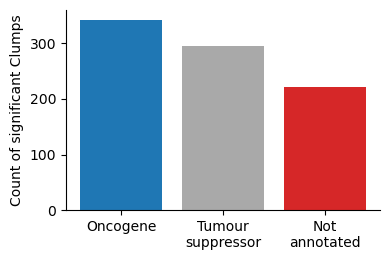

In [ ]:
## Distribution of clusters by Action

display(cluster_info.Gene_action.value_counts().reset_index())

plt.figure(figsize=(4, 2.7))
df = cluster_info[cluster_info["Gene_action"] != "Ambiguous"].Gene_action.value_counts().reset_index()
df["index"] = df["index"].str.replace(" ", "\n")
plt.bar(df['index'], df['Gene_action'], 
        color=['C10', 'darkgray', 'C3'])
plt.xlabel(None)
plt.ylabel('Count of significant Clumps')
# plt.title('Clusters distribution by gene action')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
cluster_info[cluster_info["Gene_action"] == "Tumour suppressor"].Gene.unique()

array(['FBXW7', 'TP53', 'PPP6C', 'SMAD4', 'SPOP', 'MED12', 'PTEN',
       'PPP2R1A', 'BCOR', 'BAP1', 'VHL', 'CDKN2A', 'ID3', 'MAX', 'RPL10',
       'SMARCA4', 'SIRPA', 'DNMT3A', 'KMT2C', 'PIK3R1', 'SETD2', 'ERCC2',
       'DICER1', 'CTCF', 'CDH1'], dtype=object)

In [ ]:
cluster_info[cluster_info["Gene_action"] == "Oncogene"].Gene.unique()

array(['PIK3CA', 'FGFR3', 'BRAF', 'NRAS', 'CTNNA2', 'CTNNB1', 'KRAS',
       'ERBB2', 'ERBB3', 'EGFR', 'KIT', 'SF3B1', 'XPO1', 'MYD88', 'ALK',
       'U2AF1', 'MAP2K1', 'IDH1', 'RAC1', 'KNSTRN', 'HRAS', 'CD79B',
       'AKT1', 'FOXA1', 'KDR', 'PLCG1', 'AR', 'NSD2', 'PTPN11', 'MYCN',
       'USP8', 'IKBKB', 'CCND1', 'ARHGAP5', 'STAT3', 'SGK1', 'SMO',
       'STAT6', 'SRSF2', 'IDH2', 'FLT3', 'GATA2', 'JAK2', 'CDK4', 'GNAS',
       'ACVR1', 'DGCR8', 'MAPK1', 'MTOR', 'GNAQ', 'GNA11', 'FGFR2',
       'CHD4', 'KAT6A'], dtype=object)

In [ ]:
cluster_info[cluster_info["Gene_action"] == "Ambiguous"].Gene.unique()

array(['PCBP1', 'BCL9L', 'IKZF3', 'IRF4', 'CRNKL1', 'EZH2', 'ESR1',
       'NOTCH2', 'NFE2L2', 'HLA-A', 'ERBB4', 'ASPM', 'FOXO1', 'CREBBP',
       'KMT2D', 'KDM6A', 'BCLAF1', 'RUNX1', 'FAM47C', 'BMP5', 'CIC',
       'NOTCH1', 'KIF5B', 'MAP3K1', 'RHOA', 'CNBD1', 'EPAS1'],
      dtype=object)

In [ ]:
def get_average_gene_annot(df, gene, annot):

    return df[df["Gene"] == gene].apply(lambda x: x[annot], axis=1).values[0].mean()
    

def get_density_at_x(df, x, action, annot):

    data = df[df["Gene_action"] == action][annot].dropna()
    kde = gaussian_kde(data)
    
    return kde(x)[0]

average_gene_annot = [[gene, cluster_info[cluster_info["Gene"] == gene].Gene_action.unique()[0]] + 
                      [get_average_gene_annot(cluster_info, gene, annot) for annot in ["pLDDT", "pACC", "DDG"]] for gene in 
                      ["TP53", "KRAS", "FBXW7", "SMAD4", "CTNNB1", "NFE2L2", "EGFR", "ERBB2", "BRAF",
                       "GTF2I", "H3-3A", "CNOT9", "LILRB2", "FAM174B", "HLA-DQA1", "IGLL5", "GBP4", "C3orf70"]]

average_gene_annot = pd.DataFrame(average_gene_annot, columns=["Gene", "Gene_action", "pLDDT", "pACC", "DDG"])
average_gene_annot

,Gene,Gene_action,pLDDT,pACC,DDG
0,TP53,Tumour suppressor,96.448571,30.535714,1.475732
1,KRAS,Oncogene,87.854144,63.306306,-0.296921
2,FBXW7,Tumour suppressor,98.663333,12.666667,2.211888
3,SMAD4,Tumour suppressor,97.045455,34.606061,1.451508
4,CTNNB1,Oncogene,32.873846,88.692308,0.819255
5,NFE2L2,Ambiguous,81.287500,55.000000,0.947519
6,EGFR,Oncogene,90.675000,15.500000,1.988813
7,ERBB2,Oncogene,75.240000,76.000000,0.820335
8,BRAF,Oncogene,51.111282,4.858974,2.391432
9,GTF2I,Not annotated,93.380000,84.000000,0.583216


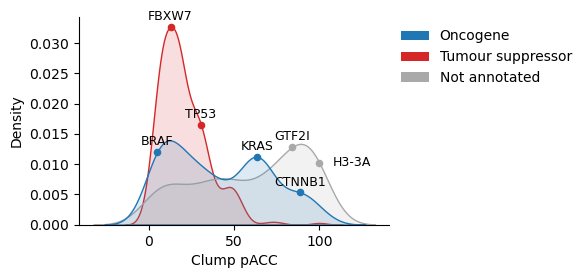

In [ ]:
# Annotated genes: average values across all Clumps detected in that gene across all cohorts
# ==========================================================================================

# Remove Ambiguous Action - pACC
# ------------------------------

# Plot 
fig, ax = plt.subplots(figsize=(4, 2.7))  
sns.kdeplot(data=cluster_info[cluster_info["Gene_action"] != "Ambiguous"], x='pACC', hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.15)

# Add labels and a legend
plt.xlabel('Clump pACC')
plt.ylabel('Density')

handles = [mpatches.Patch(facecolor=palette["Oncogene"], label="Oncogene"),
           mpatches.Patch(facecolor=palette["Tumour suppressor"], label="Tumour suppressor"),
           mpatches.Patch(facecolor=palette["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False, bbox_to_anchor=[0.55,0,1.08,1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Annotate genes
annot = "pACC"
y_max = plt.gca().get_ylim()[1]
y_shift = 0.07 if gene == "CTNNB1" else 0.05
for gene in ["KRAS", "CTNNB1", "FBXW7", "TP53", "GTF2I", "BRAF"]:
    gene = gene
    _, gene_action, gene_plddt, gene_pacc, gene_ddg = average_gene_annot[average_gene_annot["Gene"] == gene].values[0]
    y = get_density_at_x(df=cluster_info, x=gene_pacc, action=gene_action, annot=annot)
    plt.text(gene_pacc, y+y_max*y_shift, gene, ha='center', va='center', fontsize=9, color="black")
    plt.scatter(gene_pacc, y, color=palette[gene_action], s=20)

gene = "H3-3A"
_, gene_action, gene_plddt, gene_pacc, gene_ddg = average_gene_annot[average_gene_annot["Gene"] == gene].values[0]
y = get_density_at_x(df=cluster_info, x=gene_pacc, action=gene_action, annot=annot)
plt.text(gene_pacc+19, y, gene, ha='center', va='center', fontsize=9, color="black")
plt.scatter(gene_pacc, y, color=palette[gene_action], s=20)

plt.savefig("../../figures_and_tables/supplementary/s7/s7c.pacc.png", dpi=900, bbox_inches='tight')
plt.show()

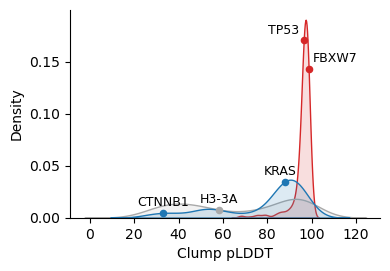

In [ ]:
## Remove Ambiguous action - pLDDT
## ------------------------------

## Plot 
fig, ax = plt.subplots(figsize=(4, 2.7))  
sns.kdeplot(data=cluster_info[cluster_info["Gene_action"] != "Ambiguous"], x='pLDDT', 
            hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.15)

# Add labels and a legend
plt.xlabel('Clump pLDDT')
plt.ylabel('Density')
# handles = [mpatches.Patch(facecolor=palette["Oncogene"], label="Oncogene"),
#            mpatches.Patch(facecolor=palette["Tumour suppressor"], label="Tumour suppressor"),
#            mpatches.Patch(facecolor=palette["Not annotated"], label="Not annotated")]
# plt.legend(handles=handles, loc="upper left", frameon=False)
ax.get_legend().remove()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Annotate genes
annot = "pLDDT"
y_max = plt.gca().get_ylim()[1]
y_shift = 0.07 if gene == "CTNNB1" else 0.05

for gene in ["KRAS", "CTNNB1", "FBXW7", "TP53", "H3-3A"]:
    gene = gene
    _, gene_action, gene_plddt, gene_pacc, gene_ddg = average_gene_annot[average_gene_annot["Gene"] == gene].values[0]
    x_shift = -9 if gene == "TP53" else 12 if gene == "FBXW7" else -2 if gene == "KRAS" else 0
    x = gene_plddt
    y = get_density_at_x(df=cluster_info, x=x, action=gene_action, annot=annot)
    plt.text(x+x_shift, y+y_max*y_shift, gene, ha='center', va='center', fontsize=9, color="black")
    plt.scatter(x, y, color=palette[gene_action], s=20)

plt.savefig("../../figures_and_tables/supplementary/s7/s7c.plddt.png", dpi=900, bbox_inches='tight')
plt.show()

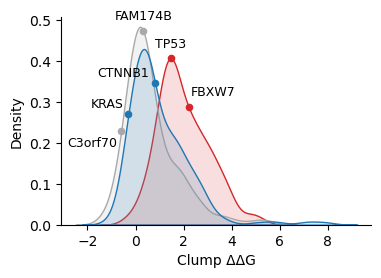

In [ ]:
## Remove Ambiguous action - ddG
## -----------------------------

## Plot 
fig, ax = plt.subplots(figsize=(4, 2.7))  
sns.kdeplot(data=cluster_info[cluster_info["Gene_action"] != "Ambiguous"], x='DDG', 
            hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.15)

# Add labels and a legend
plt.xlabel('Clump ΔΔG')
plt.ylabel('Density')
# handles = [mpatches.Patch(facecolor=palette["Oncogene"], label="Oncogene"),
#            mpatches.Patch(facecolor=palette["Tumour suppressor"], label="Tumour suppressor"),
#            mpatches.Patch(facecolor=palette["Not annotated"], label="Not annotated")]
# plt.legend(handles=handles, bbox_to_anchor=[1.2,1], frameon=False)
ax.get_legend().remove()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Annotate genes
annot = "DDG"
y_max = plt.gca().get_ylim()[1]
y_shift = 0.07

for gene in ["KRAS", "CTNNB1", "FBXW7", "TP53", "FAM174B"]:
    gene = gene
    _, gene_action, gene_plddt, gene_pacc, gene_ddg = average_gene_annot[average_gene_annot["Gene"] == gene].values[0]
    x_shift = -0.9 if gene == "KRAS" else -1.35 if gene == "CTNNB1" else 1 if gene == "FBXW7" else 0
    extra_y_shift = -0.01 if gene == "KRAS" else -0.01 if gene == "CTNNB1" else 0
    # x_shift = 0
    x = gene_ddg
    y = get_density_at_x(df=cluster_info, x=x, action=gene_action, annot=annot)
    plt.text(x+x_shift, y+y_max*y_shift+extra_y_shift, gene, ha='center', va='center', fontsize=9, color="black")
    plt.scatter(x, y, color=palette[gene_action], s=20)

gene = "C3orf70"
_, gene_action, gene_plddt, gene_pacc, gene_ddg = average_gene_annot[average_gene_annot["Gene"] == gene].values[0]
x = gene_ddg
y = get_density_at_x(df=cluster_info, x=x, action=gene_action, annot=annot)
plt.text(x-1.2, y-0.03, gene, ha='center', va='center', fontsize=9, color="black")
plt.scatter(x, y, color=palette[gene_action], s=20)

plt.savefig("../../figures_and_tables/supplementary/s7/s7c.ddg.png", dpi=900, bbox_inches='tight')
plt.show()

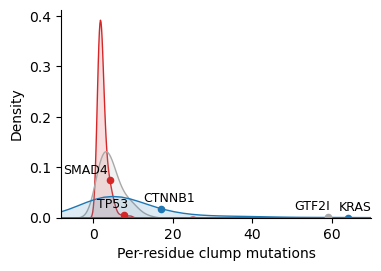

In [ ]:
## Remove Ambiguous action - Per-res cluster mut
## --------------------------------------------

## Plot 
fig, ax = plt.subplots(figsize=(4, 2.7)) 
df = cluster_info[cluster_info["Gene_action"] != "Ambiguous"]
sns.kdeplot(data=df, x='Avg_per_res_cluster_mut', 
            hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.15)

# Add labels and a legend
plt.xlabel('Per-residue clump mutations')
plt.ylabel('Density')
ax.get_legend().remove()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim(-8, 70)


# Annotate genes
annot = "Avg_per_res_cluster_mut"
y_max = plt.gca().get_ylim()[1]
y_shift = 0.05

for gene in ["TP53", "SMAD4", "KRAS", "CTNNB1", "GTF2I"]:
    mut, gene_action, cohort = df[df["Gene"] == gene].sort_values(
        "Avg_per_res_cluster_mut", ascending=False)[:1][["Avg_per_res_cluster_mut", "Gene_action", "Cohort"]].values[0]

    x_shift = -3 if gene == "TP53" else - 6 if gene == "SMAD4" else 2 if gene == "CTNNB1" else -4 if gene == "GTF2I" else 2 if gene == "KRAS" else 0
    x = mut
    y = get_density_at_x(df=cluster_info, x=x, action=gene_action, annot=annot)
    plt.text(x+x_shift, y+y_max*y_shift, gene, ha='center', va='center', fontsize=9, color="black")
    plt.scatter(x, y, color=palette[gene_action], s=20)

# plt.savefig("../../figures_and_tables/supplementary/s7/s7c.mut.png", dpi=300, bbox_inches='tight')
plt.show()

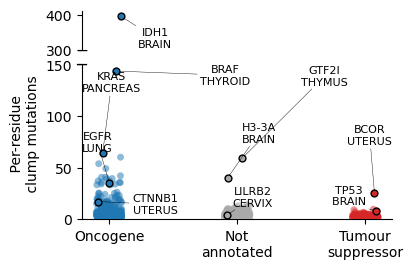

In [ ]:
## Per-res cluster mut - JITTER
## ----------------------------

palette = {'Oncogene': 'C10', 'Tumour\nsuppressor': 'C3', "Ambiguous" : "#ff6afe", 'Not\nannotated': 'darkgray'}

## Without ambiguous
## --------------

h_ratios = 0.2, 0.8
fig, axes = plt.subplots(len(h_ratios), 1, 
                         figsize=(4, 2.7),
                         sharex=False, 
                         gridspec_kw={'hspace': 0.15, 
                                      'height_ratios': h_ratios})

df = cluster_info.copy()
df.Gene_action = df.Gene_action.str.replace(" ", "\n")
sns.stripplot(data=df[df["Gene_action"] != "Ambiguous"], 
            y='Avg_per_res_cluster_mut', 
            x='Gene_action', hue="Gene_action", palette=palette, alpha=0.5, ax=axes[0])
sns.stripplot(data=df[df["Gene_action"] != "Ambiguous"], 
            y='Avg_per_res_cluster_mut', 
            x='Gene_action', hue="Gene_action", palette=palette, alpha=0.5, ax=axes[1])

axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].set_ylim(300, 410)
axes[1].set_ylim(0, 150)
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[1].set_ylabel("    Per-residue\n    clump mutations")
axes[0].spines['bottom'].set_visible(False)
axes[0].set_xticks([])
axes[1].set_xlabel(None)

axes[1].text(-0.21, 151, "--", ha='center', va='center', fontsize=13, color="black")
axes[0].text(-0.21, 300, "--", ha='center', va='center', fontsize=12, color="black")

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Annotation 
# Gene-Organ selected the cohort (Organ) where the gene shows the highest Avg_per_res_cluster_mut 
expand_text_xy=(2, 2.4)
annotations_ax0 = []
annotations_ax1 = []
for gene in ["BRAF", "KRAS", "GTF2I", "H3-3A", "BCOR", "TP53", "IDH1", "LILRB2", "CTNNB1", "EGFR"]:
    
    _, gene_action, cohort = df[df["Gene"] == gene].sort_values(
        "Avg_per_res_cluster_mut", ascending=False)[:1][["Avg_per_res_cluster_mut", "Gene_action", "Cohort"]].values[0]
    organ = cohort_df[cohort_df["COHORT"] == cohort].GENERAL_CANCER_TYPE.values[0]
    
    jx = 0 if gene_action == "Oncogene" else 1 if gene_action == "Not\nannotated" else 2
    ax = 0 if gene == "IDH1" else 1
    strip_data = axes[ax].collections[jx].get_offsets() 
    x_values = strip_data[:, 0]
    y_values = strip_data[:, 1]
    df_action = df[df["Gene_action"] == gene_action].reset_index(drop=True)
    ix = df_action[df_action["Gene"] == gene].sort_values("Avg_per_res_cluster_mut", ascending=False).index[0]
    axes[ax].scatter(x_values[ix], y_values[ix], c=palette[gene_action], ec="black", zorder=3, s=24)
    
    txt = f"    {gene}\n    {organ}\n" if gene == "TP53" else f"{gene}\n{organ}"
    annotation = axes[ax].text(x_values[ix], y_values[ix], txt, fontsize=8, color='black')
    if ax == 0:
        annotations_ax0.append(annotation)
    else:
        annotations_ax1.append(annotation)
adjust_text(annotations_ax0, expand=expand_text_xy, 
            arrowprops=dict(arrowstyle='->', color='black'), lw=0.3, ax=axes[0], zorder=3)
adjust_text(annotations_ax1, expand=expand_text_xy, 
            arrowprops=dict(arrowstyle='->', color='black'), lw=0.3, ax=axes[1], zorder=3)

plt.savefig("../../figures_and_tables/supplementary/s7/s7c.mut.png", dpi=900, bbox_inches='tight')
plt.show()

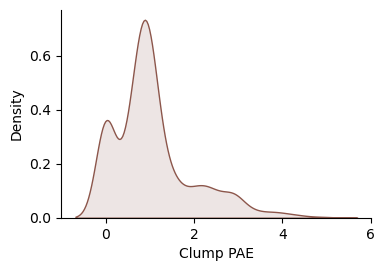

In [ ]:
## Plot 
plt.figure(figsize=(4, 2.7))

sns.kdeplot(data=cluster_info, x='PAE', fill=True, common_norm=False, alpha=0.15, color="C5")

# Add labels and a legend
plt.xlabel('Clump PAE')
plt.ylabel('Density')
# plt.title("Clumps PAE of significant genes - All cohorts", fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("../../figures_and_tables/supplementary/s7/s7d.pae.png", dpi=900, bbox_inches='tight')
plt.show()

# 4) S12a: Landscape of CH genes

In [398]:
def get_gene_cohorts_binary_ch(genetable_df, 
                            cohort_df, 
                            o3d_output_dir,
                            top_genes_n=None, 
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_organ=False,
                            sort_by_score_only=False,
                            genes_in_one_cohort=False):

    # Get hits df and clustering score info
    hits_df = get_hits(genetable_df)
    o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)

    # Count of mut
    cohort_mut_count = get_cohort_mut_count(cohort_df, o3d_output_dir)
    cohort_mut_count["Cohort"] = cohort_mut_count.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
    o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)
    anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                              o3d_output["Cohort"].values, 
                                                                              o3d_output["Clustering_score"].values)}
    max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D")
    gene_hits_count = gene_hits_count.merge(max_score_df[["Gene", "Clustering_score"]], on="Gene", how="left")
    if sort_by_score_only:
        gene_hits_count = gene_hits_count.sort_values('Clustering_score', ascending=False).set_index("Gene")
    else:
        gene_hits_count = gene_hits_count.sort_values(by=['Oncodrive3D', 'Clustering_score'], ascending=[False, False]).set_index("Gene")
    if genes_in_one_cohort:
        gene_hits_count = gene_hits_count[gene_hits_count["Oncodrive3D"] == 1]
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=cohort_df.COHORT.values, columns=top_genes)
    df_binary = pd.DataFrame(0, index=cohort_df.COHORT.values, columns=top_genes)
    for cohort in cohort_df.COHORT.values:
        genes = hits_df[hits_df["Cohort"] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]

    return df_anomaly, df_binary, hits_df, gene_hits_count


def plot_landscape_ch(df, 
                   gene_hits_count, 
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(15,14),
                   width_ratios=[1, 0.2],
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   ax8_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   plot_cohort_count_top=False,
                   plot_cohort_count_right=True,
                   log_mut_count=True,
                   lst_annot_dbs=None,
                   lst_annot_methods=None,
                   annot_methods_label=None):
    

    df_binary = df
    df = df_anomaly
    cmap = create_custom_colormap()
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    cgc_specific = cohort_hits_count["CGC_specific"].values
    cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
    not_cgc = cohort_hits_count["Not_CGC"].values  

    ncols = 4
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(1, ncols, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios})
    ax3 = ax[0]
    ax4 = ax[3]
    ax6 = ax[1]
    ax8 = ax[2]
    
    # Create the heatmap
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black")
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)

    
    # Add counts of cohort or organ for each gene
    # ============================================

    ax4_ylabel = "Cohorts count"
    cancer_or_organ = "cancer"
    if plot_cohort_count_right:
        ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
        ax4.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax4.set_yticks(np.arange(len(gene_sums)))
        ax4.set_yticklabels([])
        ax4.set_xlabel(ax4_ylabel, fontsize=10.5)
        ax4.invert_yaxis()
        ax4.xaxis.tick_top()
        ax4.xaxis.set_label_position('top')
        ax4.spines['bottom'].set_visible(False)
        ax4.spines['right'].set_visible(False)

    
    # Add annotation track
    # ====================

    if lst_annot_dbs is None:
        lst_annot_dbs = ["CGC_specific", "CGC_not_specific", "intogen_ch", "intogen_aml"]
    if lst_annot_methods is None:
        lst_annot_methods = ["hotmaps", "clustl", "smreg", "fml", "dndscv", "cbase", "mutpan"]
    
    genes = annot_df['Gene']
    annot_methods_df = annot_df.copy()[lst_annot_methods]
    annot_df = annot_df[lst_annot_dbs]
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')


    # Annotation Intogen methods
    # ==========================
    
    # Loop through each column
    indices = annot_methods_df.index.tolist()
    ax8.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_methods_df.columns):
        indices = annot_methods_df.index[annot_methods_df[col] == 1].tolist()
        ax8.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax8.set_yticks(np.arange(len(gene_sums)))
    ax8.set_yticklabels([])
    ax8.set_xticks(range(len(annot_methods_df.columns)))
    ax8.set_xticklabels([names_dict[col] for col in annot_methods_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    ax8.set_xlabel(annot_methods_label, fontsize=10.5)
    ax8.invert_yaxis()
    
    ax8.xaxis.tick_top()
    ax8.xaxis.set_label_position('top')

    
    # Details
    # =======

    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax8.margins(y=ax6_margin, x=ax8_xmargin, tight=True)
    
    if df_anomaly is not None:
        # Cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log 3D clustering score', fontsize=11) 
    
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=900, bbox_inches='tight')
    plt.show()

In [399]:
def get_annot_gene_df_ch(genes_lst,
                         genetable_df,
                         ch_intogen_df, 
                         cgc_df, 
                         alpha = 0.01,
                         lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]):

    genes = pd.Series(genes_lst)
    
    unique_hits_dict = {}
    unique_hits_dict["cgc"] = cgc_df["Gene Symbol"].values
    unique_hits_dict["intogen_ch"] = ch_intogen_df[ch_intogen_df["CH"] == "YES"].Gene.unique()
    
    # Get unique hits for each method in Intogen and O3D
    for method in lst_methods:
        unique_hits_dict[method] = genetable_df[genetable_df[f"{method}_qval"] < alpha].Gene.unique()
    
    # Get df
    annot_df = {}
    annot_df["Gene"] = genes
    for annot in unique_hits_dict.keys():
        annot_df[annot] = genes.isin(unique_hits_dict[annot]).astype(int)
    
    return pd.DataFrame(annot_df)

In [400]:
o3d_output_dir_ch = f"{datasets}/output/ch/o3d_output/{SUBDIR_CH}/{RUN_CH}"
genetable_ch = pd.read_table(f"../0.genetables/results/ch/{RUN_CH}.genetable.tsv")

cohort_ch_df = pd.DataFrame({"COHORT" : ["OTHER_WGS_HMF_FULL", 
                                         "OTHER_WXS_CH_IMPACT_PANEL", 
                                         "OTHER_WXS_TCGA_FULL"], 
                             "CANCER_TYPE" : ["CH", "CH", "CH"]})

# I think that CH genes here are the ones detected by Intogen
ch_intogen_df = pd.read_csv(f"{datasets}/ch_genes.tsv", sep = '\t')

/tmp/ipykernel_2622441/1953309045.py:24: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


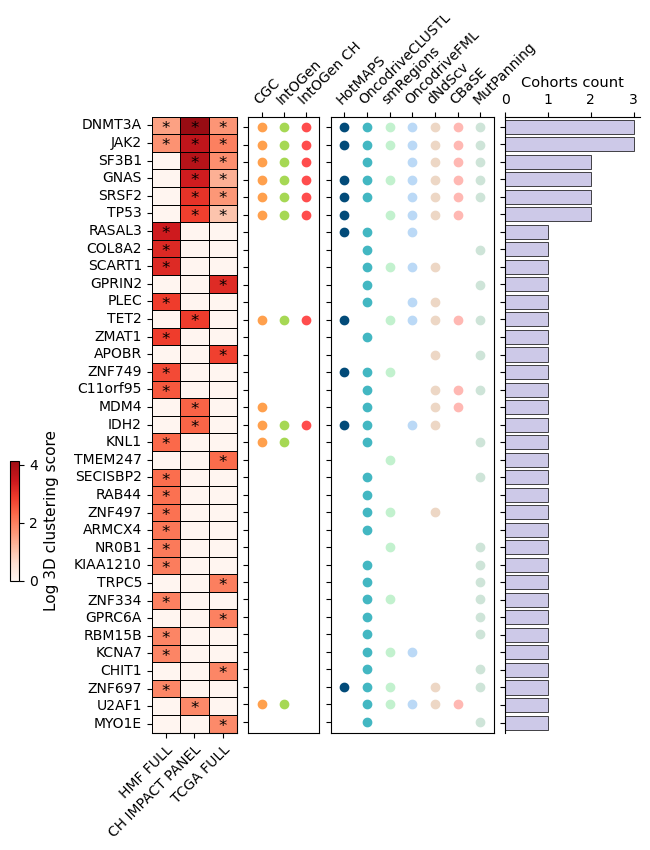

In [401]:
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count = get_gene_cohorts_binary_ch(genetable_ch, 
                                                                             cohort_ch_df, 
                                                                             o3d_output_dir=o3d_output_dir_ch,
                                                                             top_genes_n=top_genes_n, 
                                                                             cgc_df=cgc_df, 
                                                                             cohorts_parent_dict=None,
                                                                             grouped_by_organ=False,
                                                                             sort_by_score_only=False)

df_anomaly.columns = [cohort.replace("OTHER_WXS_", "") for cohort in df_anomaly.columns]
df_anomaly.columns = [cohort.replace("OTHER_WGS_", "") for cohort in df_anomaly.columns]
df_anomaly.columns = [cohort.replace("_", " ") for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df_ch(df_binary.index, genetable_ch, ch_intogen_df, cgc_df)

hits_df["Cancer"] = "AML"
hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
annot_df = annot_df.merge(hits_df[["Gene", "CGC_specific", "CGC_not_specific"]].drop_duplicates(), on="Gene", how="left")

myeloid_cohorts = cohort_df[cohort_df["GENERAL_CANCER_TYPE"] == "MYELOID"].COHORT.values
intogen_myeloid_drivers = drivers_df[drivers_df.COHORT.isin(myeloid_cohorts)].SYMBOL.unique()
intogen_other_drivers = drivers_df[~drivers_df.COHORT.isin(myeloid_cohorts)].SYMBOL.unique()
annot_df["intogen_cancer"] = annot_df.Gene.isin(drivers_df.SYMBOL.unique()).astype(int)
annot_df["intogen_aml"] = annot_df.Gene.isin(intogen_myeloid_drivers).astype(int)
annot_df["intogen_others"] = annot_df.Gene.isin(intogen_other_drivers).astype(int)

plot_landscape_ch(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               lst_annot_dbs = ["cgc", "intogen_cancer", "intogen_ch"],
               figsize=(6.3,8),
               width_ratios=[0.12, 0.1, 0.23, 0.19],
               cbar_loc=[-0.1, 0.3, 0.015, .15],
               ax4_margin=0.005,
               ax6_xmargin=0.3,
               ax8_xmargin=0.1,
               wspace=0.1, 
               hspace=0.045,
               filename="../../figures_and_tables/supplementary/s12/s12a.landscape_ch.png")

In [402]:
genetable_ch[genetable_ch["o3d_qval"] < 0.01].Gene.unique()

array(['RASAL3', 'COL8A2', 'SCART1', 'PLEC', 'ZMAT1', 'ZNF749',
       'C11orf95', 'KNL1', 'SECISBP2', 'RAB44', 'ZNF497', 'ARMCX4',
       'NR0B1', 'KIAA1210', 'ZNF334', 'RBM15B', 'KCNA7', 'ZNF697',
       'COL8A1', 'OR4C5', 'LOR', 'JAK2', 'RTL9', 'BICRA', 'FLYWCH1',
       'SPATA31E1', 'DHX58', 'DNMT3A', 'ZNF775', 'ZNF649', 'ZNF691',
       'ZNF264', 'NLRP13', 'ZNF768', 'ZNF865', 'ZNF79', 'ZNF273',
       'MARCKS', 'AHNAK', 'SOX4', 'ZNF224', 'ZNF358', 'ZNF646', 'PIWIL3',
       'FNBP1L', 'FOXN4', 'TCHH', 'SHANK1', 'SF3B1', 'GNAS', 'SRSF2',
       'TET2', 'TP53', 'MDM4', 'IDH2', 'U2AF1', 'CBL', 'ATM', 'KRAS',
       'NRAS', 'STAT3', 'CTCF', 'EGFR', 'KMT2C', 'IDH1', 'GPRIN2',
       'APOBR', 'TMEM247', 'TRPC5', 'GPRC6A', 'CHIT1', 'MYO1E', 'SPIRE2',
       'PABPC1', 'PIKFYVE', 'FAM47A', 'RP1L1', 'NUCB2', 'KRT4', 'ZNF106',
       'NBAS', 'TPRX1', 'AASDH', 'CWC25', 'AKNAD1', 'B4GALT5', 'AR',
       'NOCT', 'RPTN', 'KRTAP5-5', 'MRI1', 'DSPP', 'SDHAF2', 'NLRP8',
       'MSH3', 'FAM71E2', 'OR

In [403]:
for qval in ["o3d_qval", "cbase_qval", "dndscv_qval", "hotmaps_qval", "mutpan_qval", "clustl_qval", "fml_qval", "smreg_qval"]:
    print(qval, len(genetable_ch[genetable_ch[qval] < 0.01].Gene.unique()))

o3d_qval 111
cbase_qval 51
dndscv_qval 166
hotmaps_qval 23
mutpan_qval 92
clustl_qval 204
fml_qval 39
smreg_qval 58


## Add CH genes to T3 gene-cohort table

In [405]:
def get_all_o3d_gene_result(cohort_df, o3d_output_dir):

    lst_df = []
    for cohort in cohort_df["COHORT"].values:
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        path_csv = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        if os.path.exists(path_csv):
            df_o3d = pd.read_csv(path_csv)
            lst_df.append(df_o3d)
        else:
            print(f"Path doesn't exist: {path_csv}")

    return pd.concat(lst_df)

df_results = get_all_o3d_gene_result(cohort_ch_df, o3d_output_dir_ch)
df_results = df_results[[
    "Gene", 
    "Uniprot_ID", 
    "O3D_transcript_ID", 
    "Cohort", 
    "Score_obs_sim_top_vol", 
    "pval", 
    "qval", 
    "Clust_res", 
    "C_pos", 
    "C_label", 
    "Clust_mut", 
    "Mut_in_gene"
    ]]
df_results = df_results[df_results["qval"] < 0.01].reset_index(drop=True)
df_results = df_results.merge(cohort_df_table[["COHORT", "CANCER", "ORGAN"]].rename(columns={"COHORT" : "Cohort"}), on="Cohort", how="left")

# Clusters
df_results['C_pos'] = df_results['C_pos'].apply(lambda x: np.sort(list(map(int, x.strip('[]').split()))))
df_results["C_pos"] = df_results["C_pos"].apply(lambda lst: ", ".join(map(str, lst)))
df_results['N_clusters'] = df_results['C_label'].apply(lambda x: len(np.unique(list(map(float, x.strip('[]').split())))))

# Annotations
intogen_ch_drivers = ch_intogen_df[ch_intogen_df["CH"] == "YES"][["Gene"]].rename(columns={"Gene": "SYMBOL"}).reset_index(drop=True)
annot_df = get_annot_gene_df(df_results.Gene.unique(), genetable_ch, intogen_ch_drivers, oncokb_df, cgc_df)
df_results = df_results.merge(annot_df[["Gene", "cgc", "oncokb", "intogen"]].replace({1: "YES", 0: "NO"}), how="left")

# Parse
rename_cols = {
    "Gene" : "GENE", 
    "Uniprot_ID" : "UNIPROT ID",
    "O3D_transcript_ID" : "TRANSCRIPT ID", 
    "Cohort" : "COHORT",
    "CANCER" : "CANCER",
    "ORGAN" : "ORGAN",
    "Score_obs_sim_top_vol" : "3D CLUSTERING SCORE",
    "pval" : "PVALUE", 
    "qval" : "QVALUE",
    "Clust_res" : "NUMBER OF CLUSTERS",
    "N_clusters" : "NUMBER OF CLUMPS",
    "C_pos" : "LOCATION OF CLUSTERS", 
    "Clust_mut" : "MUTATIONS IN CLUSTERS",
    "Mut_in_gene" : "TOTAL MUTATIONS",
    "cgc" : "CGC", 
    "oncokb" : "ONCOKB", 
    "intogen" : "INTOGEN"
    }

df_results = df_results.rename(columns=rename_cols)[list(rename_cols.values())]
df_results["NUMBER OF CLUSTERS"] = df_results["NUMBER OF CLUSTERS"].astype(int)
df_results["MUTATIONS IN CLUSTERS"] = df_results["MUTATIONS IN CLUSTERS"].astype(int)

genes_by_cohort = df_results.groupby("GENE").apply(lambda x: len(x)).sort_values().reset_index().rename(columns={0 : "Cohorts_detected"})
df_results = df_results.merge(genes_by_cohort, on="GENE")

# Sort
gene_max_score = df_results.groupby('GENE')['Cohorts_detected'].transform('max')
df_results = df_results.assign(MaxScore=gene_max_score).sort_values(
    by=['MaxScore', 'GENE', 'Cohorts_detected', '3D CLUSTERING SCORE'], ascending=[False, True, False, False]).drop(
    columns=['MaxScore', 'Cohorts_detected']).reset_index(drop=True)

df_results = df_results.drop(columns=["NUMBER OF CLUMPS"])
df_results.insert(loc=df_results.columns.get_loc('ORGAN'), column='CH', value="YES") 
df_results["CANCER"] = np.nan
df_results[:20]

,GENE,UNIPROT ID,TRANSCRIPT ID,COHORT,CANCER,CH,ORGAN,3D CLUSTERING SCORE,PVALUE,QVALUE,NUMBER OF CLUSTERS,LOCATION OF CLUSTERS,MUTATIONS IN CLUSTERS,TOTAL MUTATIONS,CGC,ONCOKB,INTOGEN
0,DNMT3A,Q9Y6K1,ENST00000321117,OTHER_WXS_CH_IMPACT_PANEL,NaN,YES,BLOOD,63.217567,0.0,0.0,223,"192, 285, 290, 292, 293, 295, 296, 297, 298, 3...",1634,1647,YES,YES,YES
1,DNMT3A,Q9Y6K1,ENST00000321117,OTHER_WXS_TCGA_FULL,NaN,YES,BLOOD,5.464633,0.0,0.0,71,"295, 296, 297, 298, 307, 326, 332, 334, 337, 3...",125,159,YES,YES,YES
2,DNMT3A,Q9Y6K1,ENST00000321117,OTHER_WGS_HMF_FULL,NaN,YES,BLOOD,4.652552,0.0,0.0,20,"635, 636, 637, 650, 657, 660, 681, 698, 699, 7...",53,89,YES,YES,YES
3,JAK2,O60674,ENST00000381652,OTHER_WXS_CH_IMPACT_PANEL,NaN,YES,BLOOD,37.412126,0.0,0.0,1,617,74,82,YES,YES,YES
4,JAK2,O60674,ENST00000381652,OTHER_WXS_TCGA_FULL,NaN,YES,BLOOD,7.277923,0.0,0.0,1,617,20,47,YES,YES,YES
5,JAK2,O60674,ENST00000381652,OTHER_WGS_HMF_FULL,NaN,YES,BLOOD,5.727618,0.0,0.0,1,617,9,9,YES,YES,YES
6,GNAS,Q5JWF2,ENST00000371100,OTHER_WXS_CH_IMPACT_PANEL,NaN,YES,BLOOD,29.970351,0.0,0.0,4,"697, 844, 846, 870",44,45,YES,YES,YES
7,GNAS,Q5JWF2,ENST00000371100,OTHER_WXS_TCGA_FULL,NaN,YES,BLOOD,3.687662,0.0,0.0,2,"842, 844",10,34,YES,YES,YES
8,SF3B1,O75533,ENST00000335508,OTHER_WXS_CH_IMPACT_PANEL,NaN,YES,BLOOD,43.473029,0.0,0.0,14,"620, 622, 623, 625, 626, 662, 666, 700, 703, 7...",100,111,YES,YES,YES
9,SF3B1,O75533,ENST00000335508,OTHER_WXS_TCGA_FULL,NaN,YES,BLOOD,5.927441,0.0,0.0,7,"622, 625, 626, 662, 663, 666, 700",22,50,YES,YES,YES


In [406]:
# Concat with the gene-cohort table detected in cancer
df_results_ch = df_results
df_results = pd.read_table("../../figures_and_tables/tables/t3.detected_genes_cohorts.tsv")
df_results.insert(loc=df_results.columns.get_loc('ORGAN'), column='CH', value=np.nan) 
df_results = pd.concat([df_results, df_results_ch])

# Sort
genes_by_cohort = df_results.groupby("GENE").apply(lambda x: len(x)).sort_values().reset_index().rename(columns={0 : "Cohorts_detected"})
df_results = df_results.merge(genes_by_cohort, on="GENE")

gene_max_score = df_results.groupby('GENE')['Cohorts_detected'].transform('max')
df_results = df_results.assign(MaxScore=gene_max_score).sort_values(
    by=['MaxScore', 'GENE', 'Cohorts_detected', '3D CLUSTERING SCORE'], ascending=[False, True, False, False]).drop(
    columns=['MaxScore', 'Cohorts_detected']).reset_index(drop=True)

In [407]:
df_results.to_csv("../../figures_and_tables/tables/t3.detected_genes_cohorts.tsv", sep="\t", index=False)
df_results[:60]

,GENE,UNIPROT ID,TRANSCRIPT ID,COHORT,CANCER,CH,ORGAN,3D CLUSTERING SCORE,PVALUE,QVALUE,NUMBER OF CLUSTERS,LOCATION OF CLUSTERS,MUTATIONS IN CLUSTERS,TOTAL MUTATIONS,CGC,ONCOKB,INTOGEN
0,TP53,K7PPA8,ENST00000269305,HARTWIG_WGS_COADREAD_2023,COADREAD,NaN,COADREAD,37.386387,0.0,0.0,62,"109, 110, 113, 120, 124, 127, 132, 134, 135, 1...",261,266,YES,YES,YES
1,TP53,K7PPA8,ENST00000269305,TCGA_WXS_LGGNOS,LGGNOS,NaN,BRAIN,31.603613,0.0,0.0,71,"109, 110, 113, 120, 125, 126, 127, 130, 131, 1...",245,246,YES,YES,YES
2,TP53,K7PPA8,ENST00000269305,TCGA_WXS_COADREAD,COADREAD,NaN,COADREAD,31.338921,0.0,0.0,49,"113, 124, 127, 130, 132, 133, 135, 138, 141, 1...",207,224,YES,YES,YES
3,TP53,K7PPA8,ENST00000269305,TCGA_WXS_OVT,OVT,NaN,OVARY,24.296052,0.0,0.0,67,"105, 110, 125, 127, 130, 131, 132, 134, 135, 1...",227,229,YES,YES,YES
4,TP53,K7PPA8,ENST00000269305,TCGA_WXS_HNSC,HNSC,NaN,HEAD NECK,22.251089,0.0,0.0,70,"105, 106, 110, 125, 126, 127, 132, 133, 134, 1...",234,245,YES,YES,YES
5,TP53,K7PPA8,ENST00000269305,TCGA_WXS_UCEC,UCEC,NaN,UTERUS,19.971393,0.0,0.0,47,"126, 127, 130, 134, 135, 138, 141, 157, 158, 1...",134,137,YES,YES,YES
6,TP53,K7PPA8,ENST00000269305,HARTWIG_WGS_BRCA_2023,BRCA,NaN,BREAST,18.416195,0.0,0.0,64,"110, 111, 125, 127, 132, 133, 134, 135, 138, 1...",181,187,YES,YES,YES
7,TP53,K7PPA8,ENST00000269305,TCGA_WXS_BRCA,BRCA,NaN,BREAST,17.942296,0.0,0.0,65,"107, 111, 113, 126, 127, 130, 132, 133, 135, 1...",211,215,YES,YES,YES
8,TP53,P04637,ENST00000269305,OTHER_WXS_CH_IMPACT_PANEL,NaN,YES,BLOOD,17.021161,0.0,0.0,78,"107, 108, 109, 110, 120, 126, 127, 130, 131, 1...",227,234,YES,YES,YES
9,TP53,K7PPA8,ENST00000269305,HARTWIG_WGS_NSCLC_2023,NSCLC,NaN,LUNG,15.691384,0.0,0.0,71,"105, 107, 110, 124, 125, 127, 130, 132, 135, 1...",204,219,YES,YES,YES
